In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql3

sns.set(style="darkgrid")
ROOT_PATH="C:/Users/moshe/Documents/projectML/p1"
DATA_PATH = "%s/data/raw" % ROOT_PATH
DB_FILE = "%s/hairsalon.db" % DATA_PATH
def readSQL(query):
    import pandas as pd
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    df = pd.read_sql_query(query, db)
    db.close()
    return(df)

db=sql3.connect(DB_FILE)

#### Using median and Interquartile range (Boxplot)

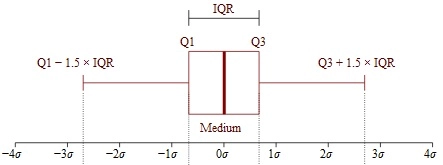

In [310]:
def zscore_outliers(x, cutoff=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    dmean = x.mean()
    dsd = x.std()
    rng = dsd * cutoff
    lower = dmean - rng
    upper = dmean + rng
    if return_thresholds:
        return lower, upper
    else:
        return [True if z < lower or z > upper else False for z in x]


def iqr_outliers(x, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25 = np.percentile(x, 25)
    q75 = np.percentile(x, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if z < lower or z > upper else False for z in x]

Retrieving data from superbooking table

In [2]:
superbooking=readSQL("""select * from superbooking""")
superbooking['clientdate']=superbooking['client']+superbooking['date']
nbappts=len(superbooking)
superbooking.columns

Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate',
       ...
       'x4_BECKY', 'x4_HOUSE', 'x4_JJ', 'x4_JOANNE', 'x4_KELLY', 'x4_NA',
       'x4_SINEAD', 'x4_TANYA', 'visit', 'clientdate'],
      dtype='object', length=183)

In [3]:
allcolumns=superbooking.columns
columnstoremove=['client', 'staff', 'service','newcustomer',
                'date', 'time', 'timeint', 'description','category',
                'canceldate', 'canceledby',
                'latecancellation', 'tdate',  'ttime',
                'firstdate','firstdate2',  'lastnoshowdate',
       'lastnoshowhour', 'lastnoshowdayinweek', 'lastvisitdate',
       'lastvisithour', 'laststaff', 'lastvisitdayinweek', 'lastservice',
       'lastcategory',  'dayhourcombi', 'dayhourcount',
       'daycount', 'hourday', 'lastvisitdayhourcombi','lastnoshowdayhourcombi','clientdate'
       'lastnoshowdayhourcombi', 'svcamt', 'lastsvcamt', 'svckey',
       'lastsvckey', 'lastservice2', 'lastcategory2', 'laststaff2','visit','clientdate','lastsvcavg']
predictorlist = [x for x in allcolumns if x not in columnstoremove]
booking=superbooking[predictorlist].copy()
dftmp=booking.columns.to_frame()
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/columnsfinaldf.xlsx"
dftmp.to_excel(filepath, index=False)
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/bookingdescribe.xlsx"
booking.describe().to_excel(filepath)
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/df.xlsx"
booking.to_excel(filepath)

In [4]:
#unique values
print(['unique values deltadaysappt',len(booking.deltadaysappt.value_counts())
      ,'deltadayslastnoshow',len(booking.deltadayslastnoshow.value_counts())
      ,'last60dvisit',len(booking.last60dvisit.value_counts())
,'last60dnoshow',len(booking.last60dnoshow.value_counts())
,'last60dbillamt',len(booking.last60dbillamt.value_counts())
,'last60misc',len(booking.last60misc.value_counts())
,'last60dcolor',len(booking.last60dcolor.value_counts())
,'last60dstyle',len(booking.last60dstyle.value_counts())
,'last60dproduct',len(booking.last60dproduct.value_counts())
,'last60dlatecancel',len(booking.last60dlatecancel.value_counts())
,'last60dregcancel',len(booking.last60dregcancel.value_counts())
,'svcavg',len(booking.svcavg.value_counts())       
      ])

['unique values deltadaysappt', 97, 'deltadayslastnoshow', 77, 'last60dvisit', 12, 'last60dnoshow', 5, 'last60dbillamt', 190, 'last60misc', 3, 'last60dcolor', 27, 'last60dstyle', 132, 'last60dproduct', 35, 'last60dlatecancel', 3, 'last60dregcancel', 4, 'svcavg', 28]


In [5]:
superbooking[['visit','firstapp','newcustomer','existingcustomer','noshowflag','multipleappt','latecancellation']].describe()

visit     firstapp  newcustomer  existingcustomer   noshowflag  \
count  1794.0  1794.000000  1794.000000       1794.000000  1794.000000   
mean      1.0     0.511148     0.494426          0.471014     0.077480   
std       0.0     0.500015     0.500108          0.499298     0.267427   
min       1.0     0.000000     0.000000          0.000000     0.000000   
25%       1.0     0.000000     0.000000          0.000000     0.000000   
50%       1.0     1.000000     0.000000          0.000000     0.000000   
75%       1.0     1.000000     1.000000          1.000000     0.000000   
max       1.0     1.000000     1.000000          1.000000     1.000000   

       multipleappt  latecancellation  
count   1794.000000       1794.000000  
mean       0.241360          0.044036  
std        0.428027          0.205232  
min        0.000000          0.000000  
25%        0.000000          0.000000  
50%        0.000000          0.000000  
75%        0.000000          0.000000  
max        1.000000          1.000000

<h2>various statistics

In [6]:
nbcustomers=len(superbooking['client'].unique())
avgapptday=len(superbooking)/len(superbooking['date'].unique())
avgapptdaylast3m=len(superbooking[superbooking.date>='2018-04-28'])/len(superbooking.loc[superbooking.date>='2018-04-28','date'].unique())
a,b,c=superbooking['noshowflag'].sum(),superbooking['latecancellation'].sum(),superbooking['visit'].sum()
print(['distinct customers',nbcustomers,'nb appts',c,'total noshows',a,'total late cancellations',b,'real noshows',a-b,
       ((a-b)/a),(b/a),'%noshow',a/len(superbooking),'avgapptday',avgapptday,'avgapptdaylast3m',avgapptdaylast3m,
       len(superbooking)/len(superbooking['clientdate'].unique())])

['distinct customers', 799, 'nb appts', 1794, 'total noshows', 139, 'total late cancellations', 79, 'real noshows', 60, 0.4316546762589928, 0.5683453237410072, '%noshow', 0.07748049052396878, 'avgapptday', 16.92452830188679, 'avgapptdaylast3m', 20.569444444444443, 1.1619170984455958]


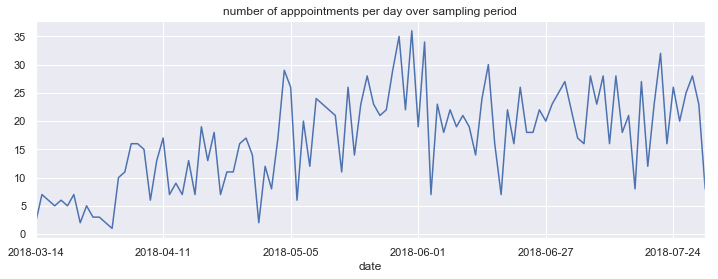

In [7]:
df=superbooking.copy()
df2=df.set_index(df['date'])
plt.figure(figsize=(12,4))
plt.title("number of apppointments per day over sampling period")
df2['visit'].groupby(['date']).sum().plot.line()

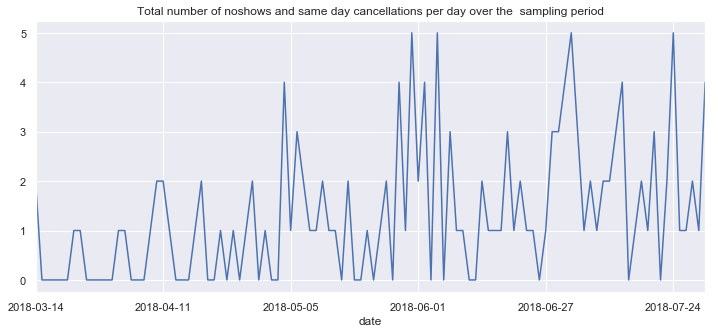

In [8]:
plt.figure(figsize=(12,5))
plt.title("Total number of noshows and same day cancellations per day over the  sampling period")
df2['noshowflag'].groupby(['date']).sum().plot()

In [9]:
df=readSQL("""select month,count(visit)/count(distinct date) avgapptsperday from superbooking group by month""")
df

month  avgapptsperday
0      3               4
1      4              11
2      5              21
3      6              20
4      7              21

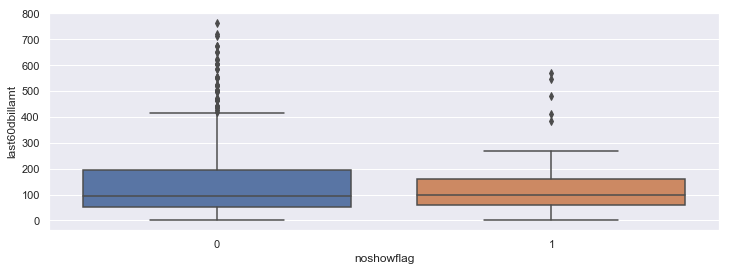

In [10]:
df=superbooking.copy()
df=df.loc[  (df.existingcustomer==1),:]
df=df.set_index(df['date'])
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="noshowflag", y="last60dbillamt", data=df)

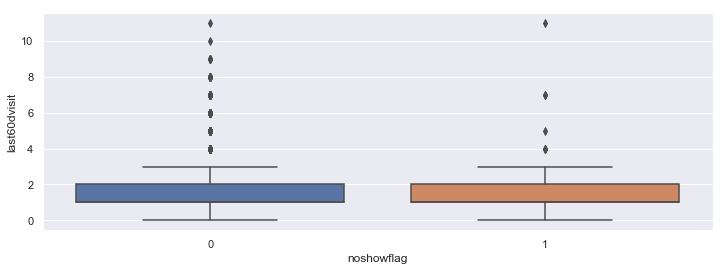

In [11]:
df=superbooking.copy()
df=df.loc[  (df.existingcustomer==1),:]
df=df.set_index(df['date'])
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="noshowflag", y="last60dvisit", data=df)

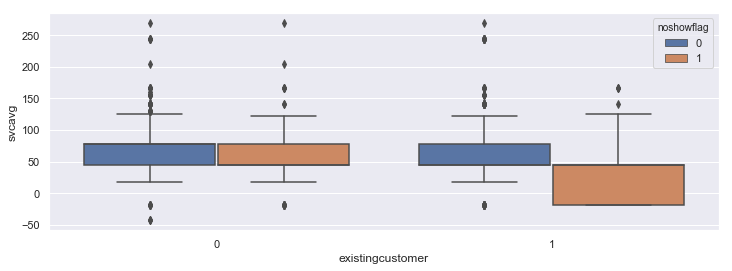

In [12]:
df=superbooking.copy()
df=df.set_index(df['date'])
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="existingcustomer", y="svcavg", hue="noshowflag",data=df)

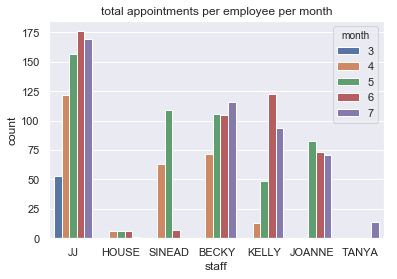

In [13]:
df=superbooking.copy()
plt.title("total appointments per employee per month")
ax = sns.countplot(x="staff",hue="month",data=df2)

Number of one time customers /recurring customers

In [14]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) = 1 order by visit desc"""
dfone=readSQL(query)
nbonetime=len(dfone)
nbonetime

458

In [15]:
superone=pd.merge(superbooking,dfone['client'],on='client',how='inner')
superone[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()
superone['clientdate']=superone['client']+superone['date']
len(superone)

520

In [16]:
len(superone['clientdate'].unique())

458

In [17]:
avgapptday=len(superone)/len(superone['clientdate'].unique())
a,b,c=superone['noshowflag'].sum(),superone['latecancellation'].sum(),superone['visit'].sum()
print([nbonetime,c,a,b,'real noshow',a-b,((a-b)/a),(b/a),'%noshow',a/len(superone),avgapptday])

[458, 520, 34, 18, 'real noshow', 16, 0.47058823529411764, 0.5294117647058824, '%noshow', 0.06538461538461539, 1.1353711790393013]


In [18]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) > 1 order by visit desc"""
dfmulti=readSQL(query)
nbmulti=len(dfmulti)
supermulti=pd.merge(superbooking,dfmulti['client'],on='client',how='inner')
supermulti['clientdate']=supermulti['client']+supermulti['date']
supermulti[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()

visit     firstapp  newcustomer   noshowflag  multipleappt  \
count  1274.0  1274.000000  1274.000000  1274.000000   1274.000000   
mean      1.0     0.311617     0.311617     0.082418      0.251962   
std       0.0     0.463336     0.463336     0.275108      0.434310   
min       1.0     0.000000     0.000000     0.000000      0.000000   
25%       1.0     0.000000     0.000000     0.000000      0.000000   
50%       1.0     0.000000     0.000000     0.000000      0.000000   
75%       1.0     1.000000     1.000000     0.000000      1.000000   
max       1.0     1.000000     1.000000     1.000000      1.000000   

       latecancellation  
count       1274.000000  
mean           0.047881  
std            0.213598  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [19]:
avgapptday=len(supermulti)/len(supermulti['clientdate'].unique())
nbappt1streceipt=len(supermulti[supermulti.existingcustomer==0])
nbapptafterreceipt=len(supermulti[supermulti.existingcustomer==1])
a,b,c=supermulti['noshowflag'].sum(),supermulti['latecancellation'].sum(),supermulti['visit'].sum()
print([nbmulti,c,'noshow',a,'late',b,'realnoshow',a-b,((a-b)/a),(b/a),avgapptday,'nbappt1streceipt',nbappt1streceipt,
     'nbapptafterreceipt',nbapptafterreceipt])

[341, 1274, 'noshow', 105, 'late', 61, 'realnoshow', 44, 0.41904761904761906, 0.580952380952381, 1.1731123388581952, 'nbappt1streceipt', 429, 'nbapptafterreceipt', 845]


In [20]:
len(supermulti)

1274

<h2> number of customers having multiple effective visits done in studied period

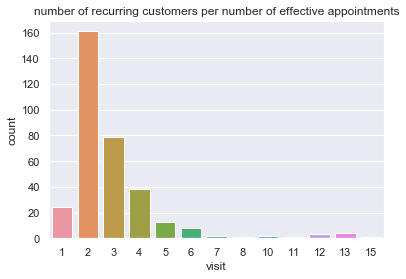

In [21]:
query="""select client, count(distinct date) visit from  superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1) and noshowflag=0  group by client"""
df=readSQL(query)
plt.title("number of recurring customers per number of effective appointments")
ax = sns.countplot(x="visit",data=df)

number of average effective visits per recurring customer

In [22]:
df.mean()

visit    2.979228
dtype: float64

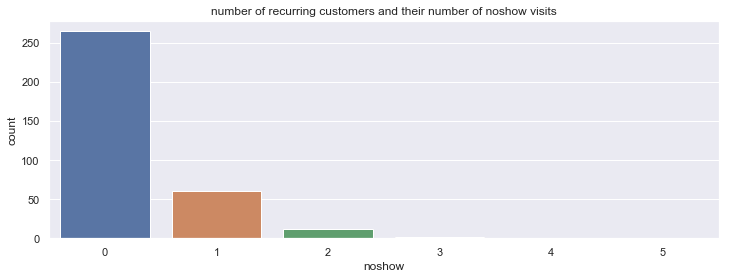

In [23]:
plt.figure(figsize=(12,4))
query="""select client, count(distinct date) noshow from superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1) and noshowflag=1 group by client
union select client, 0 noshow from superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1 and  SUM(noshowflag)=0)"""
df=readSQL(query)
plt.title("number of recurring customers and their number of noshow visits")
ax = sns.countplot(x="noshow",data=df)

In [24]:
print(['average number of noshows/customer',df.mean()])

['average number of noshows/customer', noshow    0.290323
dtype: float64]


In [25]:
print(['customer with one no show ',(df[df['noshow']==1].count())/(df.count()),
      'customer with two no show at least',(df[df['noshow']>=2].count())/(df.count())])

['customer with one no show ', client    0.175953
noshow    0.175953
dtype: float64, 'customer with two no show at least', client    0.046921
noshow    0.046921
dtype: float64]


Distribution deltadays between 2 effective appointments 

In [26]:
df=supermulti.copy()
df=df.loc[(df.deltadaysappt != 0)  & (df.noshowflag==0) ,:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadaysappt']]
df3.describe()

deltadaysappt
count     667.000000
mean       32.416792
std        21.879349
min         1.000000
25%        14.000000
50%        31.000000
75%        43.000000
max       133.000000

In [27]:
print(['% of recurring subs coming within 60 days',len(df3[df3.deltadaysappt<=60])/len(df3)])

['% of recurring subs coming within 60 days', 0.904047976011994]


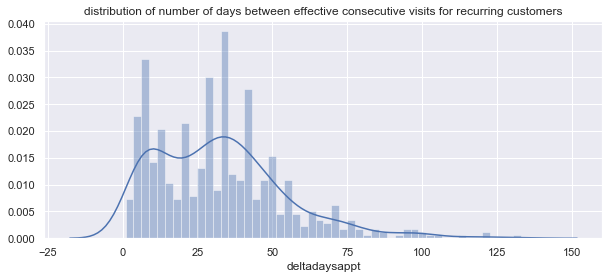

In [28]:
plt.figure(figsize=(10,4))
plt.title("distribution of number of days between effective consecutive visits for recurring customers")
ax=sns.distplot(df3.deltadaysappt,norm_hist=True,bins=50)

In [29]:
df3.deltadaysappt.mean()

32.416791604197904

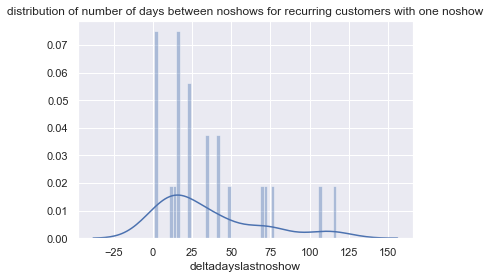

In [30]:
df=supermulti.copy()
df=df.loc[(df.deltadayslastnoshow!=0) & (df.noshowflag==1),:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadayslastnoshow']]
plt.title("distribution of number of days between noshows for recurring customers with one noshow")
ax=sns.distplot(df3.deltadayslastnoshow,norm_hist=True,bins=50)

The average number days between two noshows

In [31]:
df3.mean()

deltadayslastnoshow    35.043478
dtype: float64

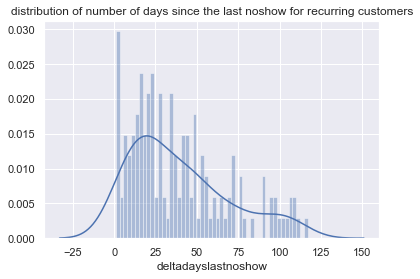

In [32]:
df=supermulti.copy()
df=df.loc[(df.deltadayslastnoshow!=0),:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadayslastnoshow']]
plt.title("distribution of number of days since the last noshow for recurring customers")
ax=sns.distplot(df3.deltadayslastnoshow,norm_hist=True,bins=50)

In [33]:
#first appointment 7% noshows
df=superbooking.copy()
df=df.loc[(df.firstapp==1),:]
df.describe()

timeint  noshowflag  latecancellation       month        week  \
count   884.000000  917.000000        917.000000  917.000000  917.000000   
mean    823.642534    0.069793          0.035987    5.163577    3.222465   
std     170.536662    0.254937          0.186359    1.138577    1.290128   
min     480.000000    0.000000          0.000000    3.000000    1.000000   
25%     677.500000    0.000000          0.000000    4.000000    2.000000   
50%     830.000000    0.000000          0.000000    5.000000    3.000000   
75%     960.000000    0.000000          0.000000    6.000000    4.000000   
max    1170.000000    1.000000          1.000000    7.000000    5.000000   

        dayinweek        hour  firstapp  newcustomer  existingcustomer  ...  \
count  917.000000  884.000000     917.0   917.000000             917.0  ...   
mean     3.128680   13.454751       1.0     0.940022               0.0  ...   
std      1.503568    2.810994       0.0     0.237576               0.0  ...   
min      1.000000    8.000000       1.0     0.000000               0.0  ...   
25%      2.000000   11.000000       1.0     1.000000               0.0  ...   
50%      3.000000   13.000000       1.0     1.000000               0.0  ...   
75%      4.000000   16.000000       1.0     1.000000               0.0  ...   
max      6.000000   19.000000       1.0     1.000000               0.0  ...   

         x3_TANYA  x4_BECKY  x4_HOUSE  x4_JJ  x4_JOANNE  x4_KELLY  x4_NA  \
count  917.000000     917.0     917.0  917.0      917.0     917.0  917.0   
mean     0.010905       0.0       0.0    0.0        0.0       0.0    1.0   
std      0.103913       0.0       0.0    0.0        0.0       0.0    0.0   
min      0.000000       0.0       0.0    0.0        0.0       0.0    1.0   
25%      0.000000       0.0       0.0    0.0        0.0       0.0    1.0   
50%      0.000000       0.0       0.0    0.0        0.0       0.0    1.0   
75%      0.000000       0.0       0.0    0.0        0.0       0.0    1.0   
max      1.000000       0.0       0.0    0.0        0.0       0.0    1.0   

       x4_SINEAD  x4_TANYA  visit  
count      917.0     917.0  917.0  
mean         0.0       0.0    1.0  
std          0.0       0.0    0.0  
min          0.0       0.0    1.0  
25%          0.0       0.0    1.0  
50%          0.0       0.0    1.0  
75%          0.0       0.0    1.0  
max          0.0       0.0    1.0  

[8 rows x 158 columns]

In [34]:
#following appointments 8.5% noshows
df=superbooking.copy()
df=df.loc[(df.firstapp==0),:]
df.describe()

timeint  noshowflag  latecancellation       month        week  \
count   831.000000  877.000000        877.000000  877.000000  877.000000   
mean    798.291215    0.085519          0.052452    6.012543    3.429875   
std     174.936042    0.279812          0.223063    0.910907    1.272710   
min     480.000000    0.000000          0.000000    4.000000    1.000000   
25%     660.000000    0.000000          0.000000    5.000000    2.000000   
50%     780.000000    0.000000          0.000000    6.000000    4.000000   
75%     950.000000    0.000000          0.000000    7.000000    5.000000   
max    1160.000000    1.000000          1.000000    7.000000    5.000000   

        dayinweek        hour  firstapp  newcustomer  existingcustomer  ...  \
count  877.000000  831.000000     877.0   877.000000        877.000000  ...   
mean     3.151653   13.040915       0.0     0.028506          0.963512  ...   
std      1.461387    2.907947       0.0     0.166509          0.187608  ...   
min      1.000000    8.000000       0.0     0.000000          0.000000  ...   
25%      2.000000   11.000000       0.0     0.000000          1.000000  ...   
50%      3.000000   13.000000       0.0     0.000000          1.000000  ...   
75%      4.000000   15.000000       0.0     0.000000          1.000000  ...   
max      6.000000   19.000000       0.0     1.000000          1.000000  ...   

         x3_TANYA    x4_BECKY    x4_HOUSE       x4_JJ   x4_JOANNE    x4_KELLY  \
count  877.000000  877.000000  877.000000  877.000000  877.000000  877.000000   
mean     0.004561    0.233751    0.009122    0.419612    0.101482    0.060433   
std      0.067419    0.423457    0.095127    0.493777    0.302139    0.238424   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            x4_NA   x4_SINEAD    x4_TANYA  visit  
count  877.000000  877.000000  877.000000  877.0  
mean     0.036488    0.137970    0.001140    1.0  
std      0.187608    0.345066    0.033768    0.0  
min      0.000000    0.000000    0.000000    1.0  
25%      0.000000    0.000000    0.000000    1.0  
50%      0.000000    0.000000    0.000000    1.0  
75%      0.000000    0.000000    0.000000    1.0  
max      1.000000    1.000000    1.000000    1.0  

[8 rows x 158 columns]

<h2> handling outliers values

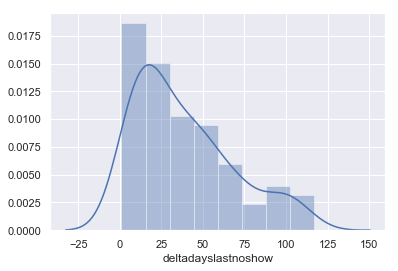

In [327]:
X=booking.loc[booking['deltadayslastnoshow']>0,:]
sns.distplot(X['deltadayslastnoshow'])

In [328]:
X['deltadayslastnoshow'].describe()

count    174.000000
mean      38.373563
std       29.607716
min        1.000000
25%       14.250000
50%       31.500000
75%       55.000000
max      117.000000
Name: deltadayslastnoshow, dtype: float64

In [322]:
out2 = iqr_outliers(X['deltadayslastnoshow'], k=1.25, return_thresholds=False)
np.sum(out2)  

6

In [330]:
iqr_outliers(X['deltadayslastnoshow'], k=1.25, return_thresholds=True)

(-36.6875, 105.9375)

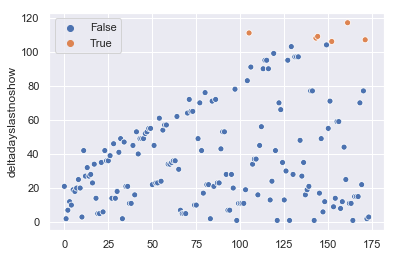

In [325]:
X1=X.reset_index(drop=True)
sns.scatterplot(x=X1.index.to_list(),y=X1['deltadayslastnoshow'],hue=out2) 

<h2> handling missing values

In [202]:
booking2=booking.copy()
miss = booking.isna().sum()
miss[miss>0]

hour      79
svcavg     4
dtype: int64

<h4>svcavg: is NULL. occurs for the  service FRI that only generated noshows. We will replace its value with the service with the lower positive average value

In [233]:
lessexpensive= booking2.loc[booking2.svcavg>0,'svcavg'].min()
booking2.loc[booking.svcavg.isna(),'svcavg']=lessexpensive

<h4>hour: handling missing values. It occurs when cancelleation was done on the date of the appointment. We assume that each employee has an average distribution of appointms during the day over the entire period. We'll run KNN, Randomforest and XGboost and take the average value.

In [234]:
columnstokeep=booking2.loc[:,booking2.columns.str.startswith('x3_')].columns
columnstokeep=columnstokeep.append(pd.Index(['month','week','dayinweek','hour','noshowflag']))
booking3=booking2[columnstokeep].copy()
for  c in booking3.columns:
    if (c!='hour' and booking3[c].nunique() < 14):
        booking3[c] = booking3[c].astype('category')
booking3c=booking2[columnstokeep].copy()
for  c in booking3.columns:
    if (booking3c[c].nunique() < 14):
        booking3c[c] = booking3[c].astype('category')

In [235]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)
booking4=booking3.copy()
X=booking3.loc[booking3['hour'].notna(),booking3.columns!='hour']
y=booking3.loc[booking3['hour'].notna(),'hour']
knn.fit(X, y)
booking4=booking3.copy()
booking4['hourknn']=booking3['hour']
booking4['hourknn1']=booking3['hour']
booking4['hourknn2']=booking3['hour']
booking4['hourknn3']=booking3['hour']
booking4.loc[booking4.hour.isna(),'hourknn']=knn.predict(booking3.loc[booking3['hour'].isna(),booking3.columns!='hour'])

In [236]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=3)
X=booking3c.loc[booking3c['hour'].notna(),booking3c.columns!='hour']
y=booking3c.loc[booking3c['hour'].notna(),'hour']
kneigh.fit(X, y) 
booking4.loc[booking4.hour.isna(),'hourkneigh']=kneigh.predict(booking3c.loc[booking3c['hour'].isna(),booking3c.columns!='hour'])
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [237]:
from sklearn.neighbors import RadiusNeighborsClassifier
neigh = RadiusNeighborsClassifier(radius=1.0)
X=booking3c.loc[booking3c['hour'].notna(),booking3c.columns!='hour']
y=booking3c.loc[booking3c['hour'].notna(),'hour']
neigh.fit(X, y) 
booking4.loc[booking4.hour.isna(),'hourneigh']=neigh.predict(booking3c.loc[booking3c['hour'].isna(),booking3c.columns!='hour'])
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [238]:
bcancelled=booking3.loc[booking3['hour'].isna(),:].copy()
bcancelled['rank']=1
bcancelled.loc[bcancelled.duplicated(subset=['x3_BECKY', 'x3_HOUSE', 'x3_JJ', 'x3_JOANNE', 'x3_KELLY', 'x3_SINEAD',
       'x3_TANYA', 'month', 'week', 'dayinweek','rank'],keep='first')==True,'rank']=2
bcancelled.loc[bcancelled.duplicated(subset=['x3_BECKY', 'x3_HOUSE', 'x3_JJ', 'x3_JOANNE', 'x3_KELLY', 'x3_SINEAD',
       'x3_TANYA', 'month', 'week', 'dayinweek','rank'],keep='first')==True,'rank']=3

In [246]:
list1=bcancelled[bcancelled['rank']==1].index.tolist()
list2=bcancelled[bcancelled['rank']==2].index.tolist()
columnstokeep=['x3_BECKY','x3_HOUSE','x3_JJ','x3_JOANNE','x3_KELLY','x3_SINEAD','x3_TANYA','month','week','dayinweek','noshowflag']
#columnstokeep2=['x3_BECKY','x3_HOUSE','x3_JJ','x3_JOANNE','x3_KELLY','x3_SINEAD','x3_TANYA','month','noshowflag']
columnstokeep2=['x3_BECKY','x3_HOUSE','x3_JJ','x3_JOANNE','x3_KELLY','x3_SINEAD','x3_TANYA','dayinweek']

In [262]:
booking4['hourkneigh1']=booking3c['hour']
booking4.loc[list1,'hourkneigh1']=kneigh.predict(bcancelled.loc[bcancelled['rank']==1,columnstokeep])
neigh2 = RadiusNeighborsClassifier(radius=1.0,weights='distance')
X=booking4.loc[booking4['hourkneigh1'].notna(),columnstokeep2]
y=booking4.loc[booking4['hourkneigh1'].notna(),'hourkneigh1']
neigh2.fit(X, y)
booking4['hourneigh2']=booking4['hourkneigh1']
booking4.loc[list2,'hourneigh2']=neigh2.predict(bcancelled.loc[bcancelled['rank']==2,columnstokeep2])
booking4.to_sql('booking4',db,if_exists='replace',index=False)
neigh2.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'outlier_label': None,
 'p': 2,
 'radius': 1.0,
 'weights': 'distance'}

In [263]:
booking4.loc[list1,'hourknn1']=pd.to_numeric((knn.predict(bcancelled.loc[bcancelled['rank']==1,columnstokeep])))
X=booking4.loc[booking4['hourknn1'].notna(),columnstokeep]
y=booking4.loc[booking4['hourknn1'].notna(),'hourknn1']
knn2 = KNeighborsRegressor(n_neighbors=2)
knn2.fit(X, y)
booking4.loc[list2,'hourknn2']=knn.predict(bcancelled.loc[bcancelled['rank']==2,columnstokeep])
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [264]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X, y)
booking4['hourrandom']=booking3['hour']
booking4.loc[booking4.hour.isna(),'hourrandom']=regr.predict(booking3.loc[booking3['hour'].isna(),booking3.columns!='hour'])

In [265]:
import xgboost as xgb
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'reg:linear' }
num_round = 10
X=booking3.loc[booking3['hour'].notna(),booking3.columns!='hour']
y=booking3.loc[booking3['hour'].notna(),'hour']
dtrain=xgb.DMatrix(np.array(X), label=y)
modelxgb = xgb.train(param, dtrain, num_round)
# make prediction
dtest = xgb.DMatrix(np.array(booking3.loc[booking3['hour'].isna(),booking3.columns!='hour']))
booking4['hourxgb']=booking3['hour']
booking4.loc[booking4.hour.isna(),'hourxgb']=modelxgb.predict(dtest)

In [266]:
dtest1 = xgb.DMatrix(np.array(bcancelled.loc[bcancelled['rank']==1,columnstokeep]))
booking4.loc[list1,'hourxgb1']=modelxgb.predict(dtest1)
columnstokeep2=['x3_BECKY','x3_HOUSE','x3_JJ','x3_JOANNE','x3_KELLY','x3_SINEAD','x3_TANYA','month']
X=booking4.loc[booking4['hourxgb1'].notna(),columnstokeep2]
y=booking4.loc[booking4['hourxgb1'].notna(),'hourxgb1']
dtrain=xgb.DMatrix(np.array(X), label=y)
modelxgb = xgb.train(param, dtrain, num_round)
dtest2 = xgb.DMatrix(np.array(bcancelled.loc[bcancelled['rank']==2,columnstokeep2]))
booking4.loc[list2,'hourxgb2']=modelxgb.predict(dtest2)
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [267]:
#averaging
booking4['houravg']=pd.to_numeric(np.floor((booking4['hourknn']+booking4['hourrandom']+booking4['hourxgb'])/3),
                                  downcast='float')
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [291]:
booking2['hour']=booking4['hourneigh2']
#removing row where hour is null corresponds to a triple cancellation occruing on the same date for the same employee
booking2=booking2.loc[booking2['hour'].notna(),:].reset_index(drop=True)
len(booking2)


1793

In [292]:
#regenerating one hot encoding
booking2['hourdaycombi']='wkday-'+booking2['dayinweek'].astype(str)+' hour-'+booking2['hour'].astype(str)
from sklearn.preprocessing import OneHotEncoder
df1hot=booking2[['hourdaycombi']].copy()
enc = OneHotEncoder(handle_unknown='ignore')
hotarray=enc.fit_transform(df1hot.values).toarray()
hotdf=pd.DataFrame(hotarray,columns=enc.get_feature_names())
booking3=pd.concat([booking2,hotdf],axis=1)
booking3=booking3.loc[:,np.invert(booking3.columns.str.startswith('x0_day'))]
booking3=booking3.drop(['hourdaycombi','month','x4_NA'], 1)
dftmp=booking3.columns.to_frame()
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/columnsfinaldf.xlsx"
dftmp.to_excel(filepath)
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/df.xlsx"
booking3.to_excel(filepath)
len(booking3)

1793

<h2> Explore data

In [294]:
import pyMechkar as mechkar
final=booking3.copy()
for c in final.columns:
    if final[c].nunique() < 14 and c not in['last60misc','last60dvisit','last60dlatecancel','last60dregcancel']:
        final[c] = final[c].astype('category')
final['deltadaysappt']=final['deltadaysappt'].astype('int64')
final['deltadayslastnoshow']=final['deltadayslastnoshow'].astype('int64')
final.dtypes

noshowflag                category
week                      category
dayinweek                 category
hour                      category
firstapp                  category
existingcustomer          category
deltadaysappt                int64
deltadayslastnoshow          int64
last60dvisit                 int64
multipleappt              category
previousnoshow            category
last60dnoshow             category
last60dbillamt             float64
last60misc                 float64
last60dcolor               float64
last60dstyle               float64
last60dproduct             float64
last90dproductbuyer       category
activebundlepromo         category
last60dlatecancel            int64
last60dregcancel             int64
svcavg                     float64
x1_COLOR                  category
x1_MISC                   category
x1_STYLE                  category
x2_CAL                    category
x2_CALC                   category
x2_CAS                    category
x2_CBAL             

Directory  report  already exists
Directory  report  already exists


C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

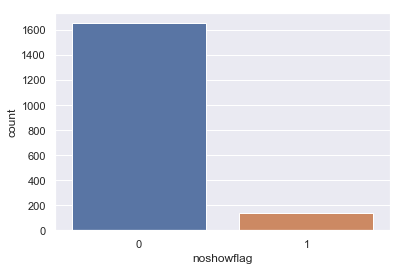

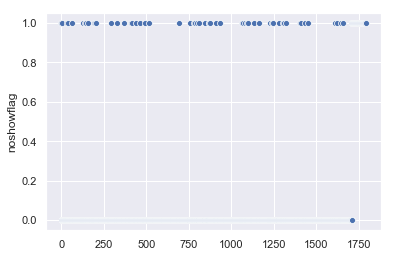

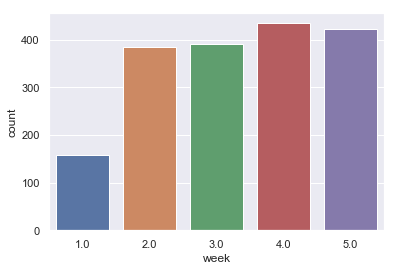

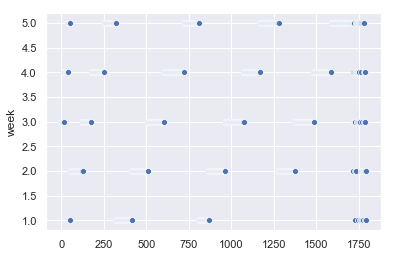

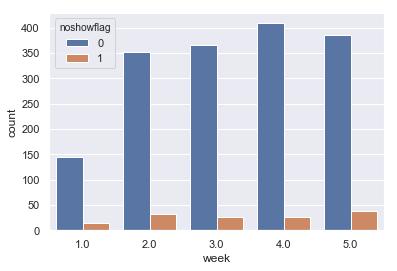

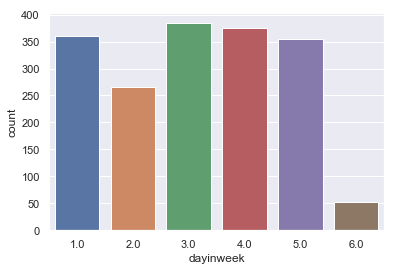

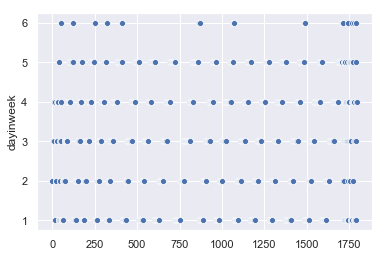

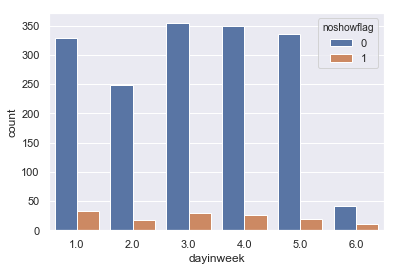

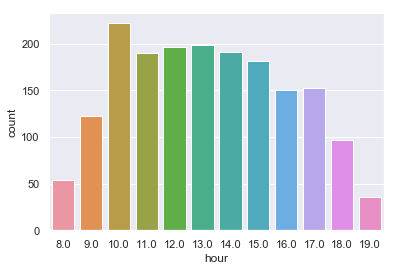

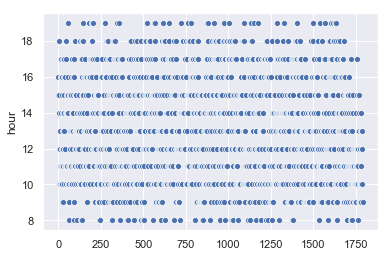

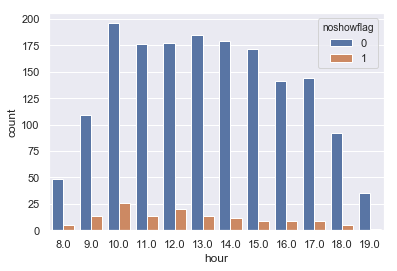

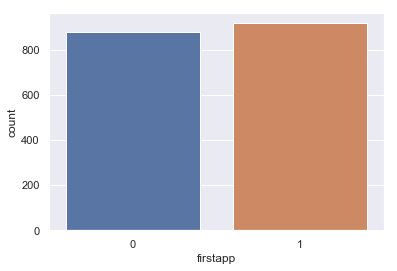

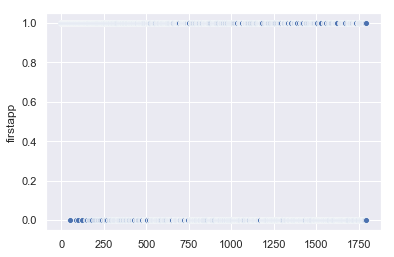

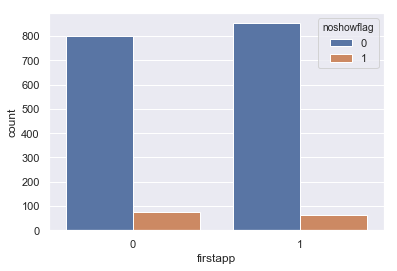

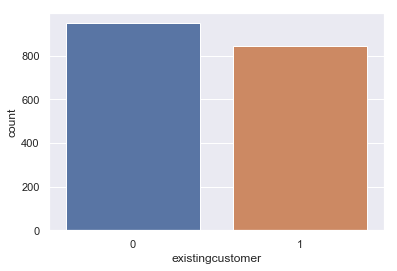

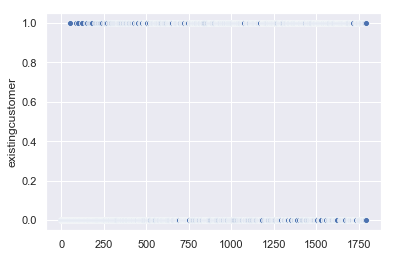

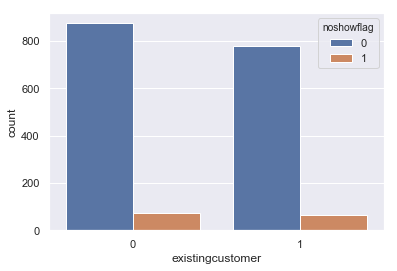

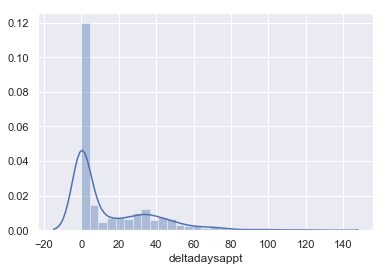

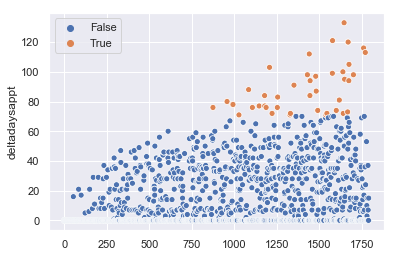

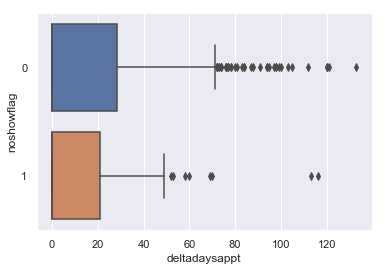

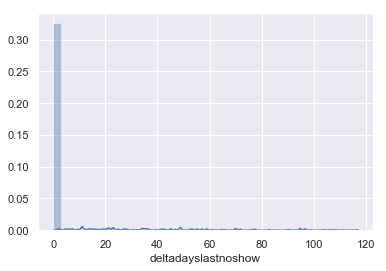

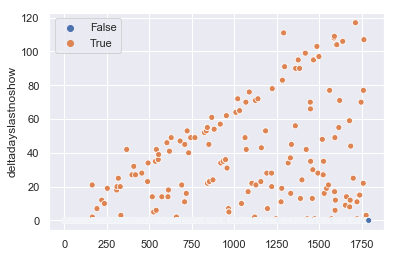

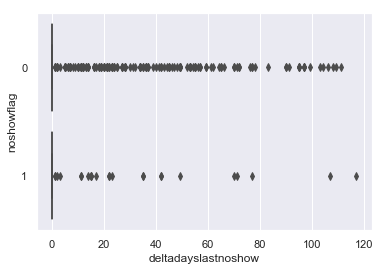

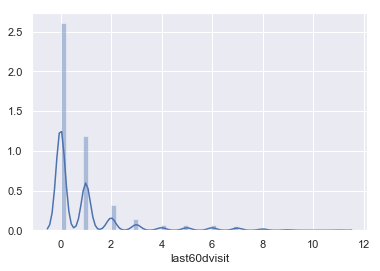

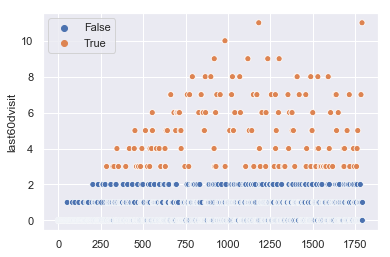

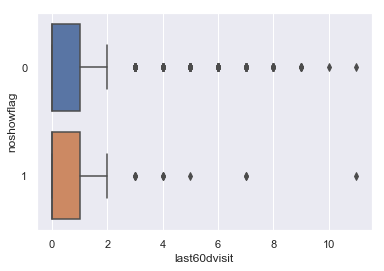

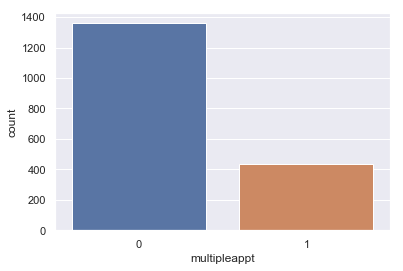

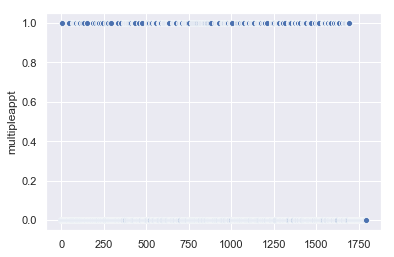

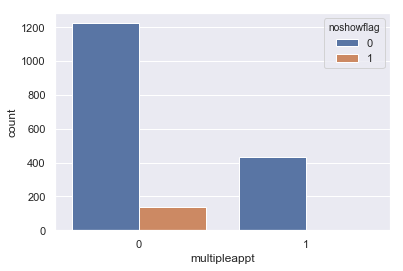

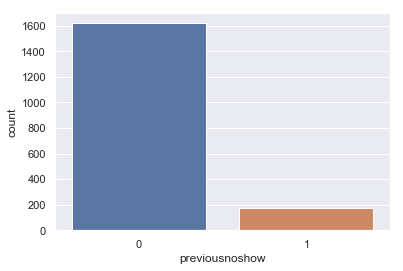

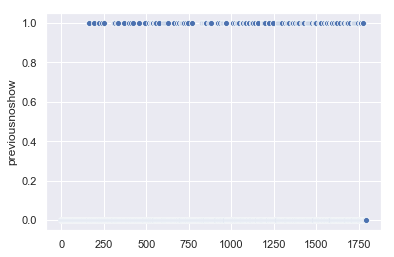

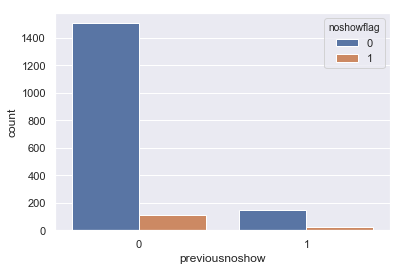

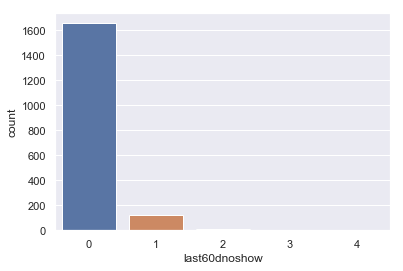

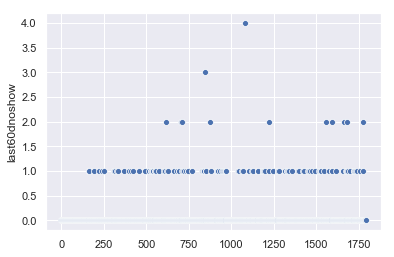

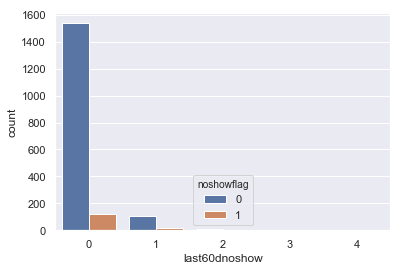

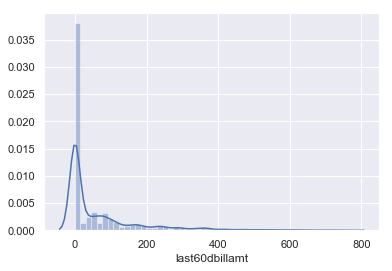

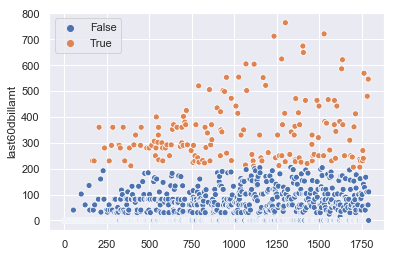

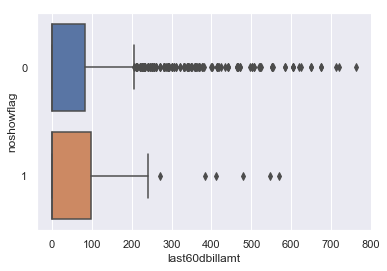

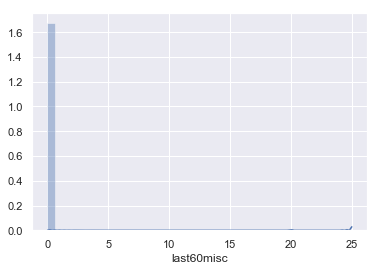

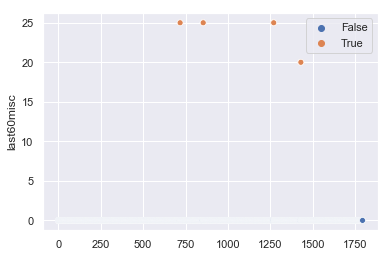

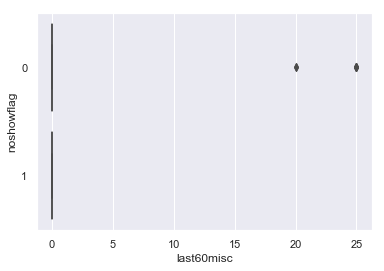

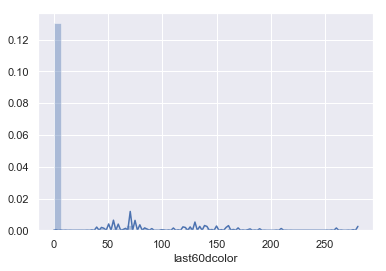

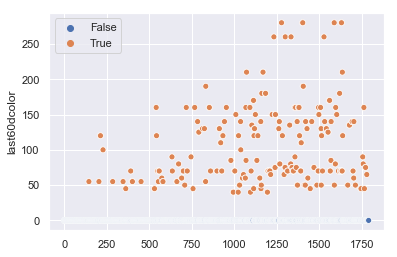

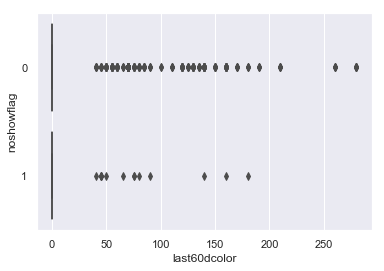

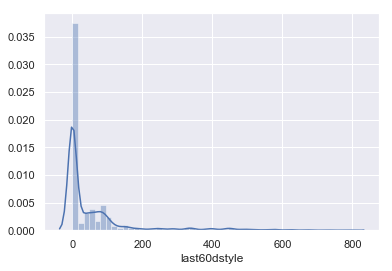

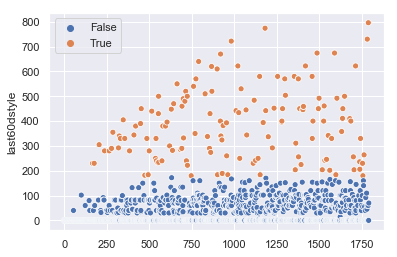

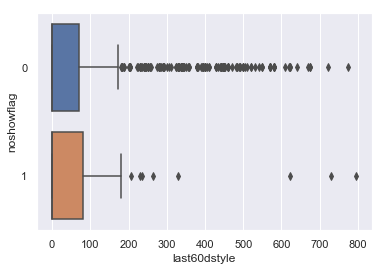

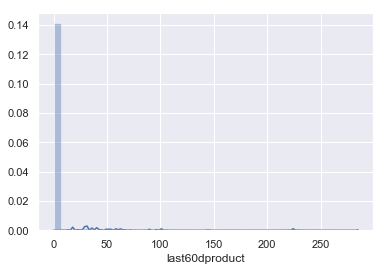

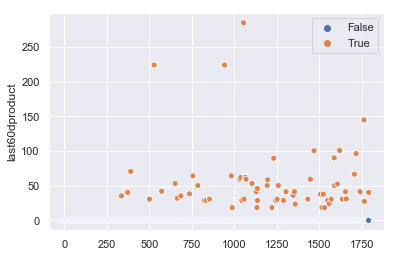

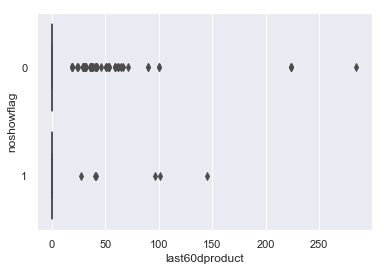

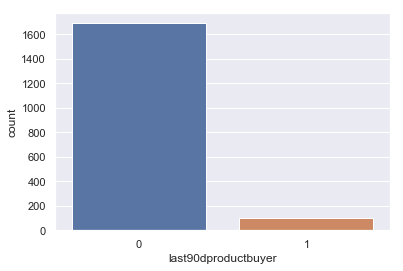

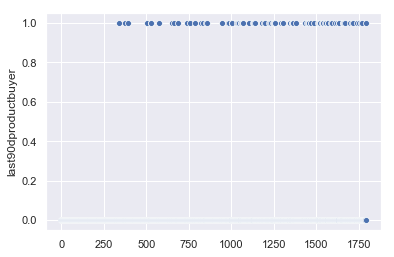

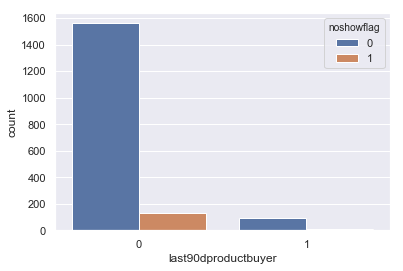

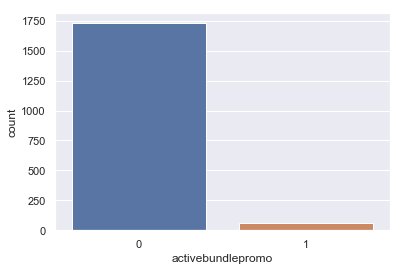

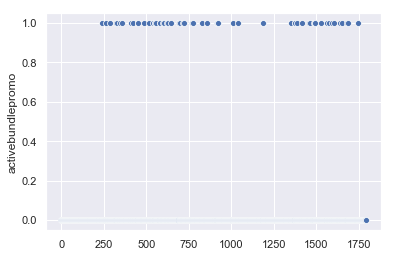

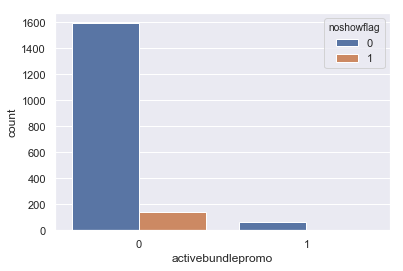

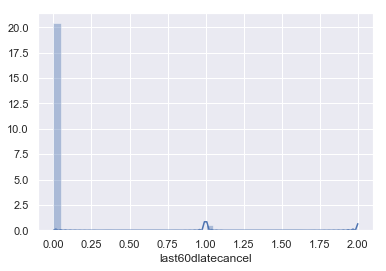

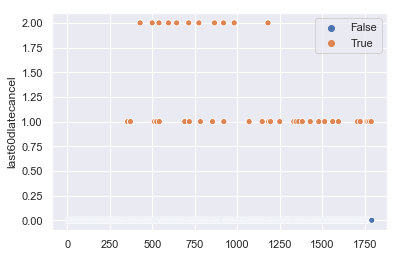

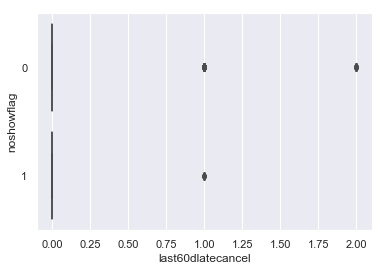

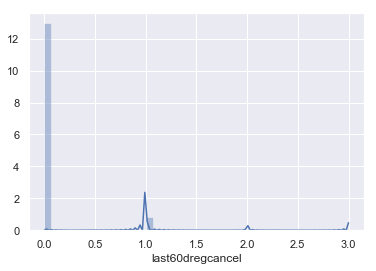

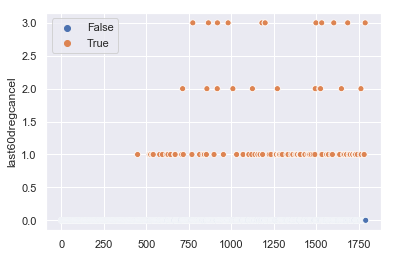

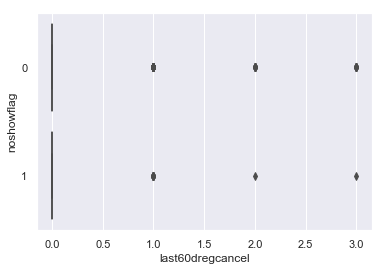

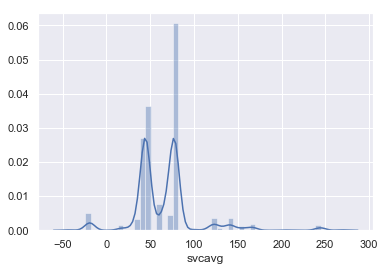

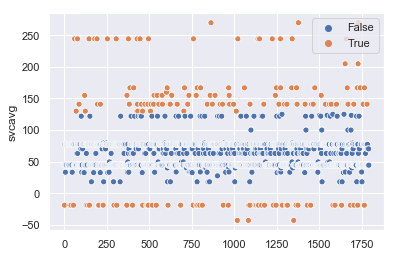

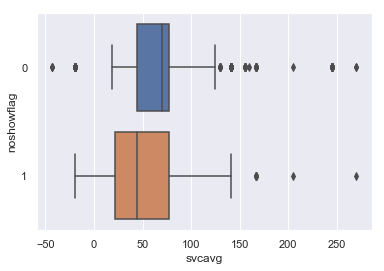

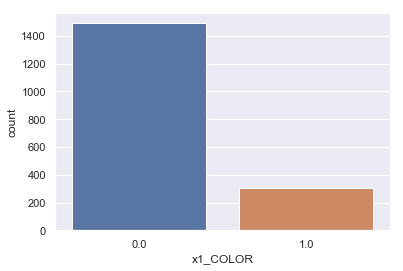

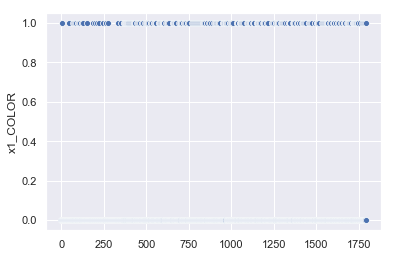

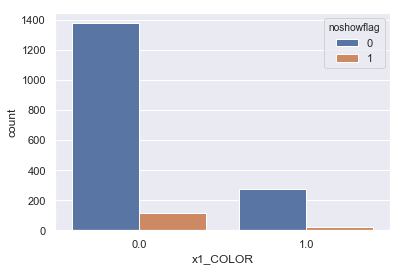

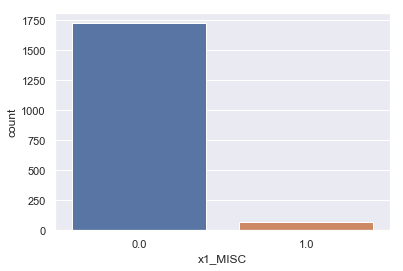

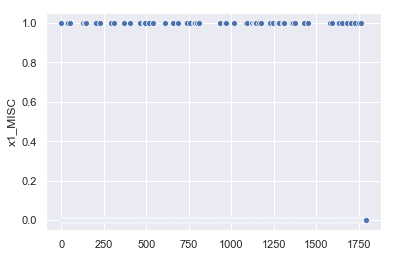

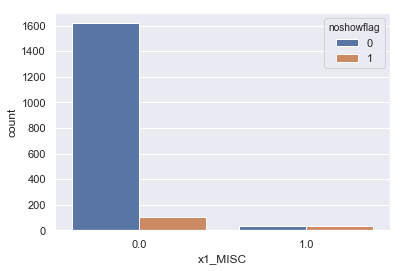

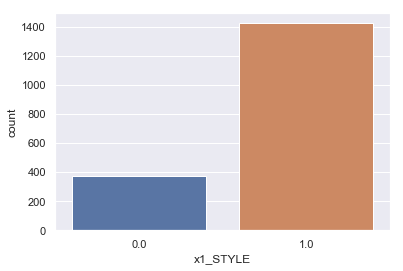

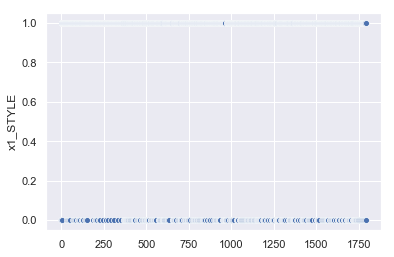

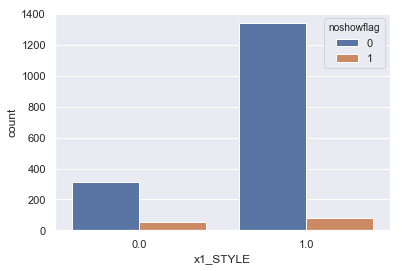

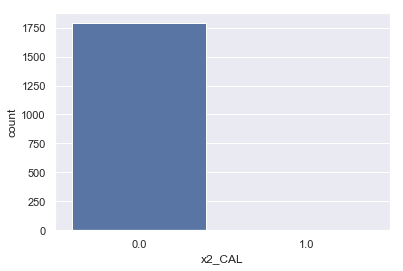

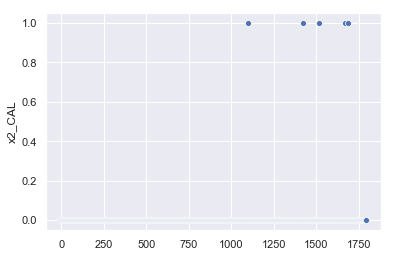

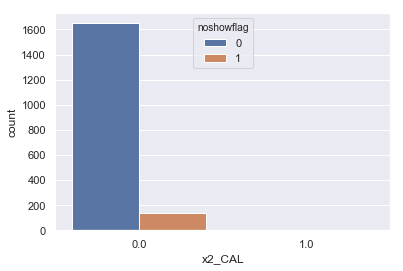

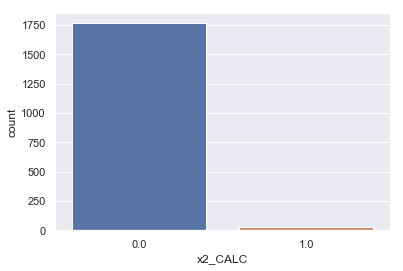

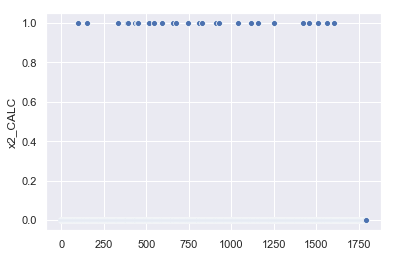

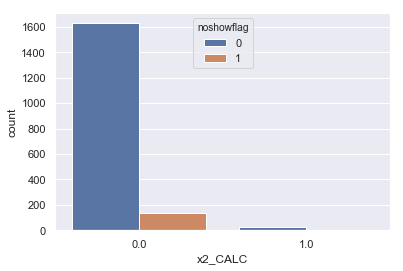

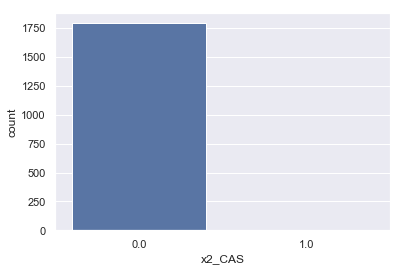

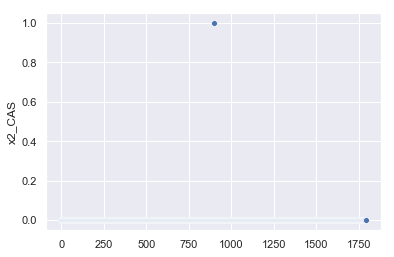

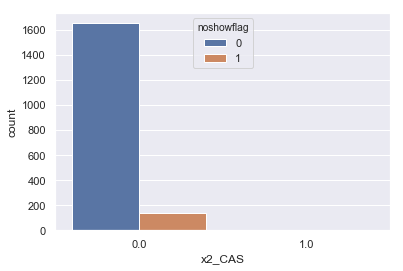

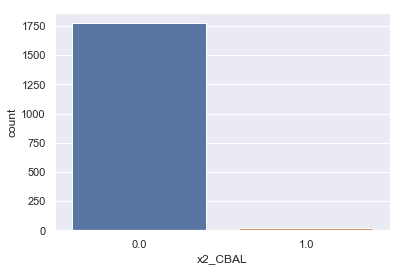

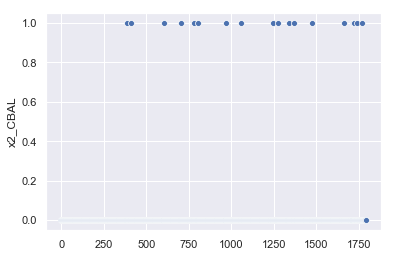

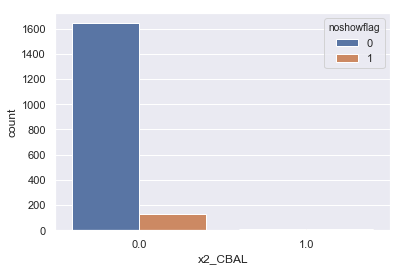

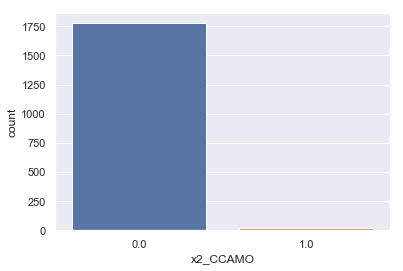

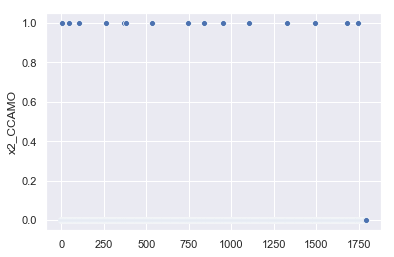

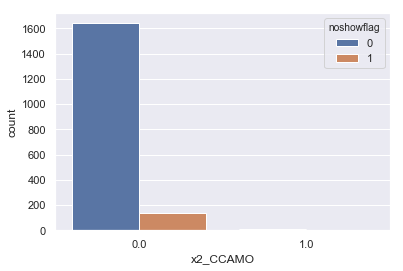

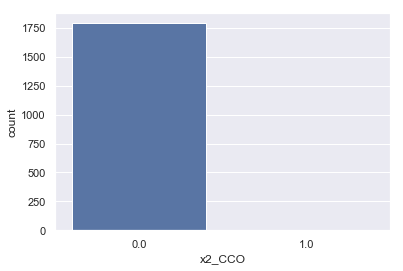

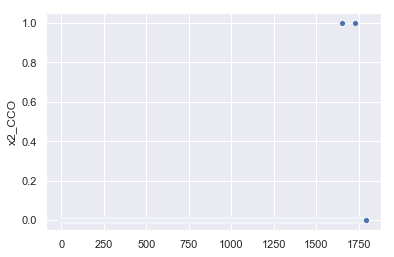

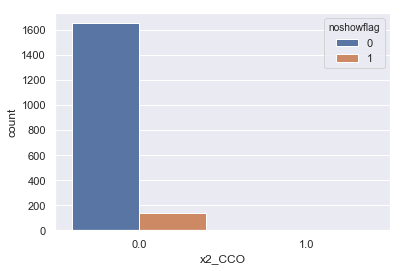

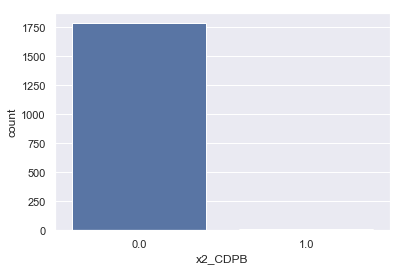

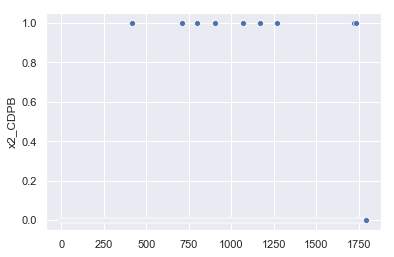

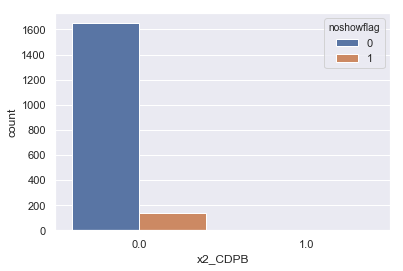

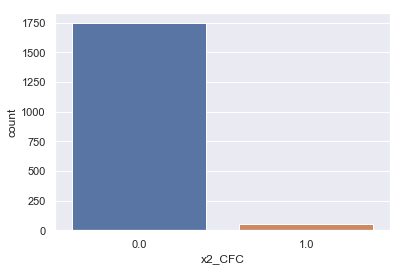

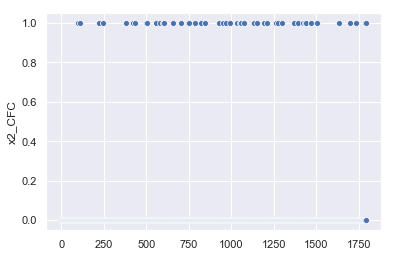

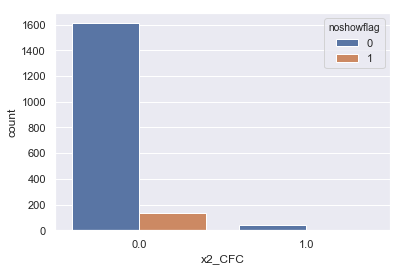

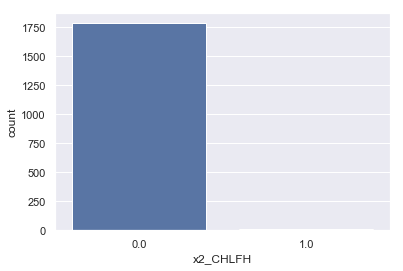

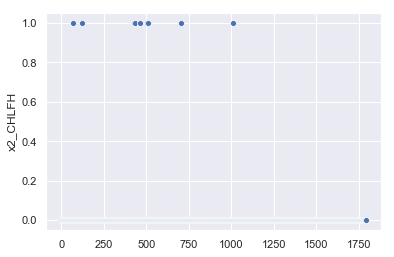

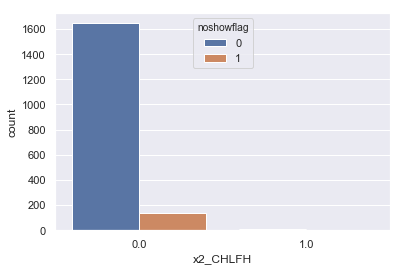

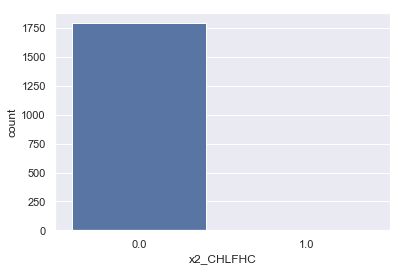

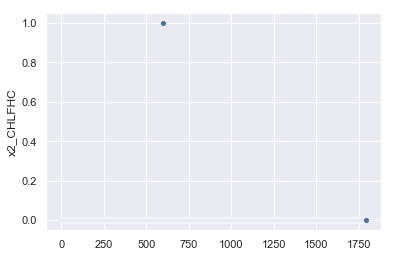

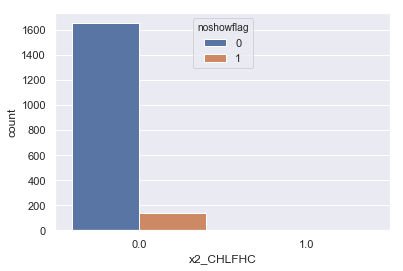

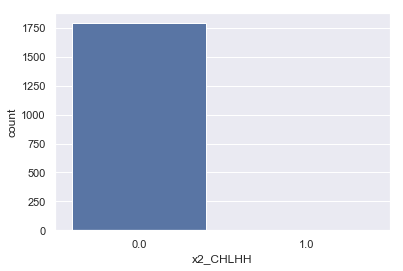

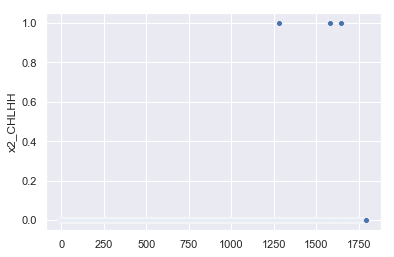

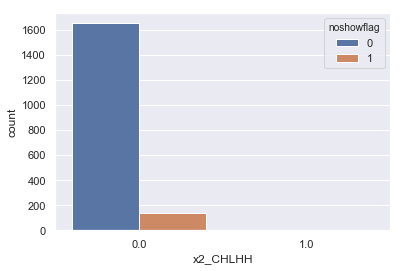

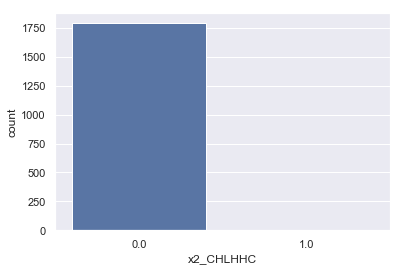

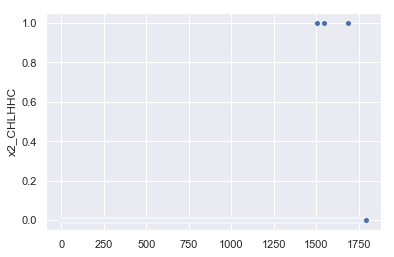

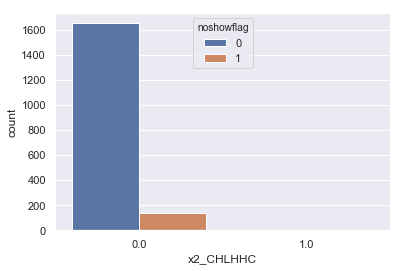

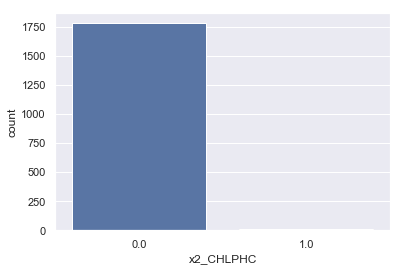

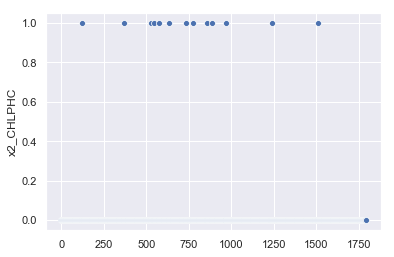

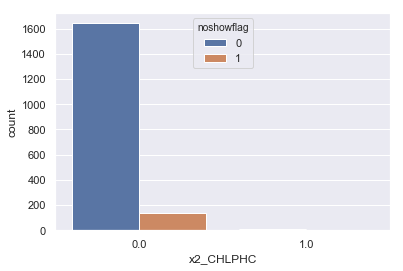

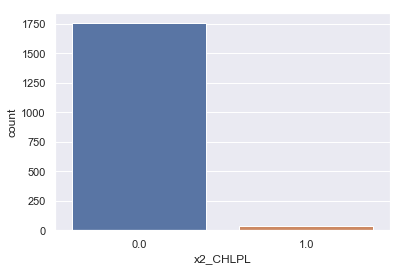

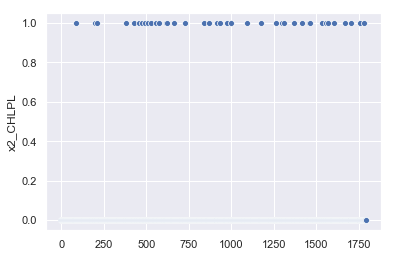

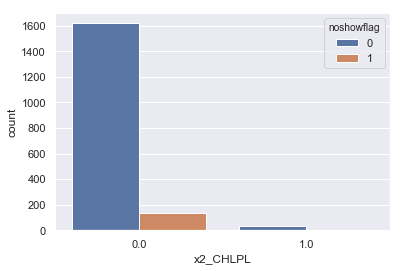

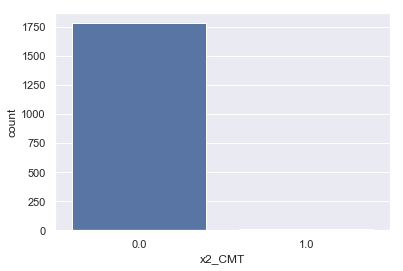

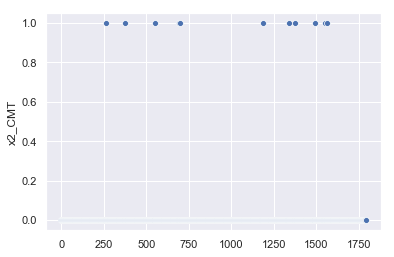

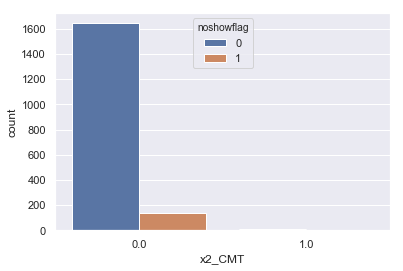

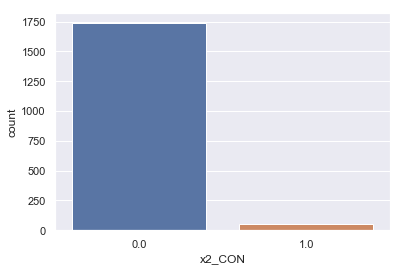

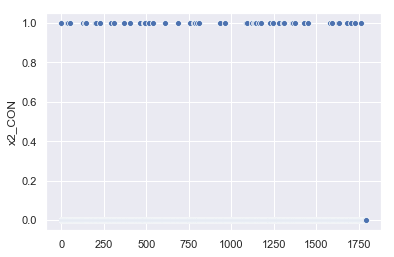

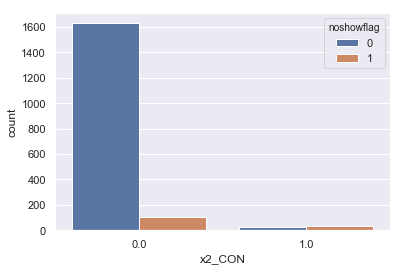

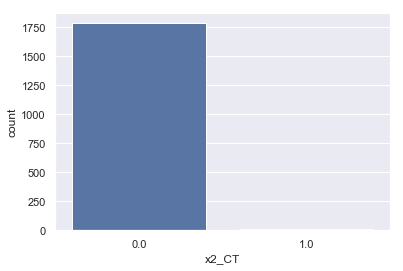

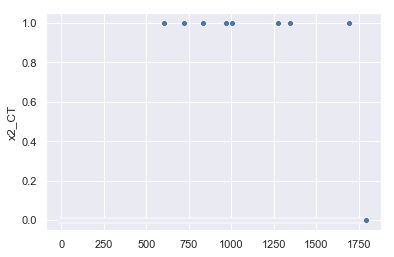

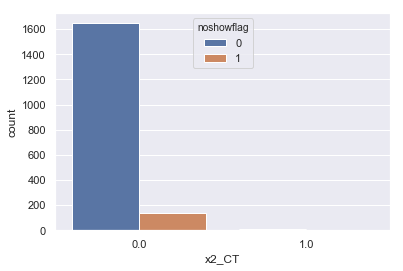

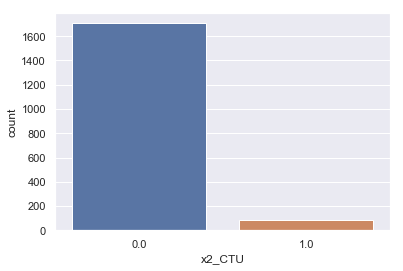

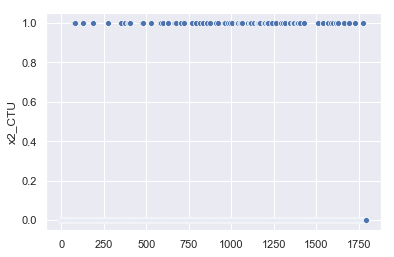

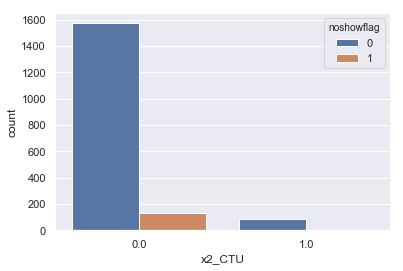

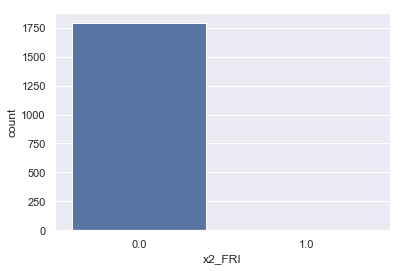

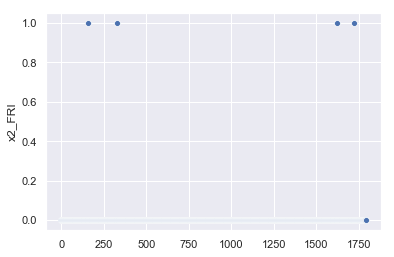

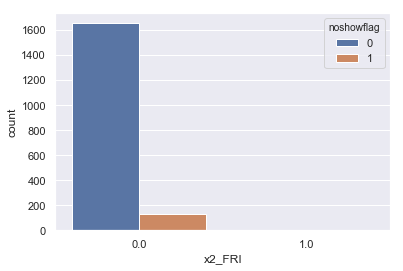

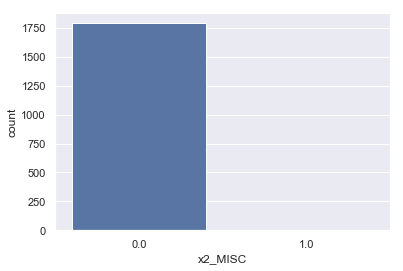

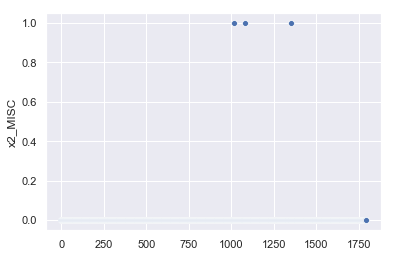

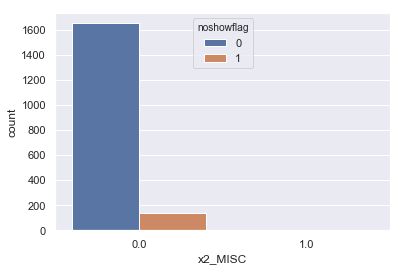

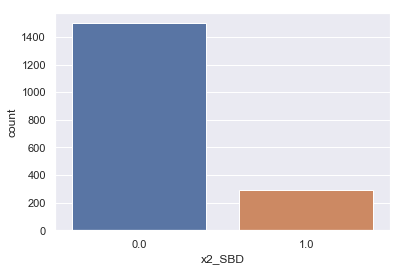

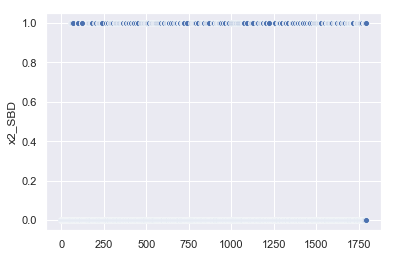

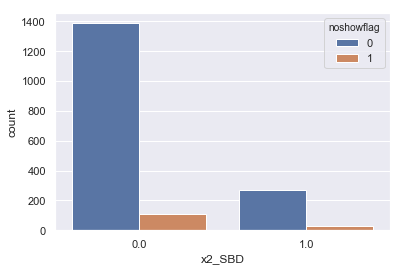

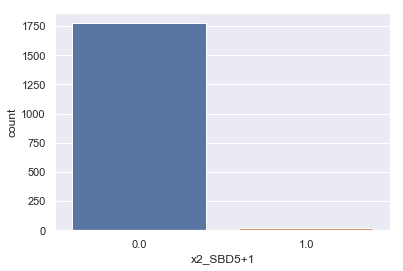

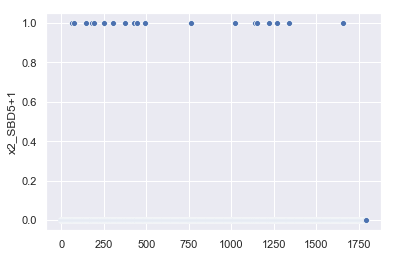

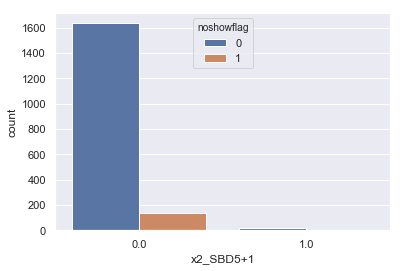

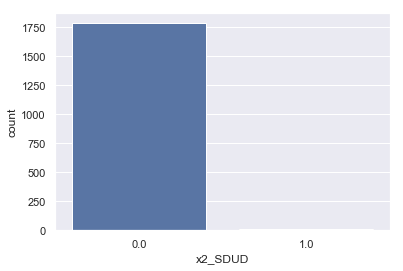

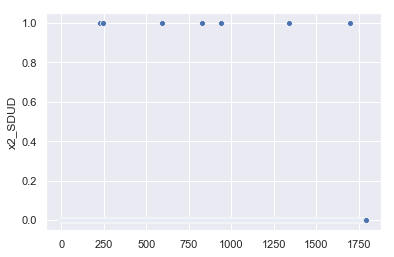

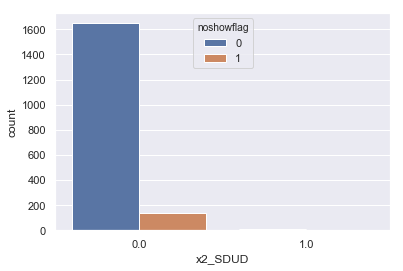

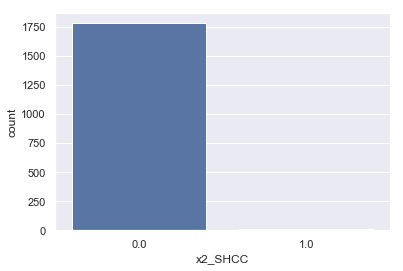

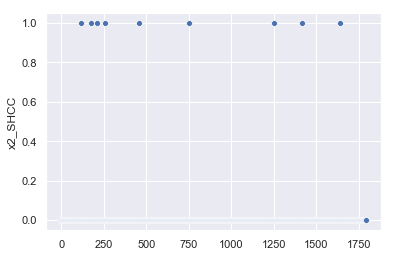

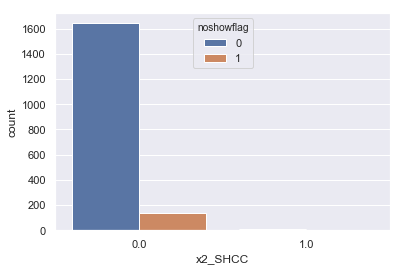

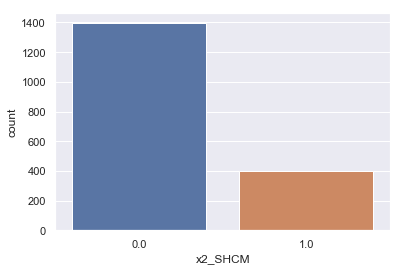

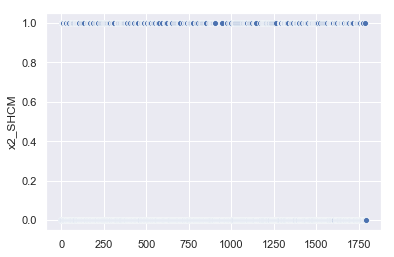

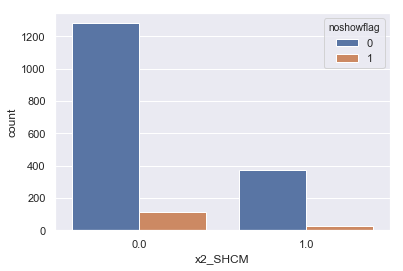

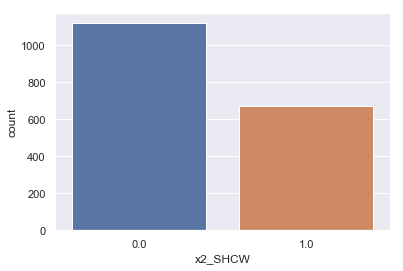

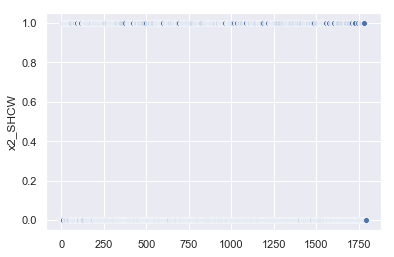

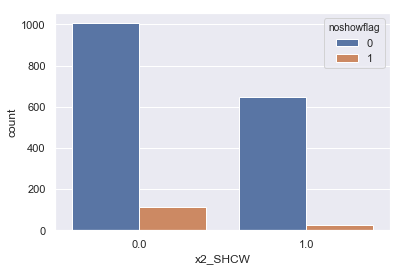

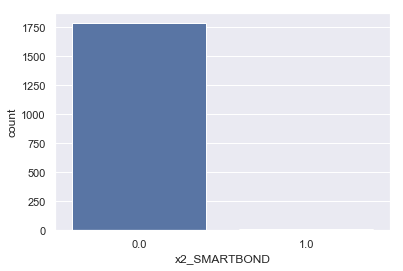

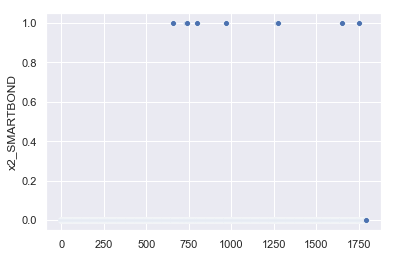

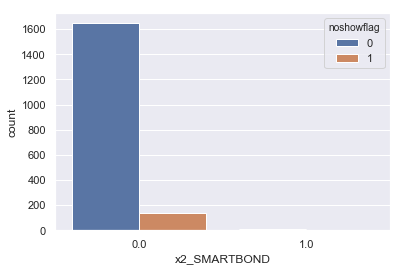

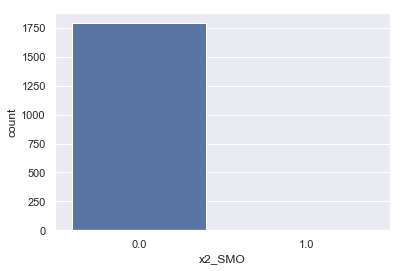

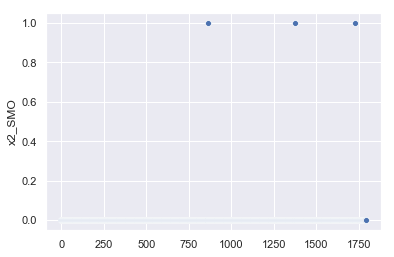

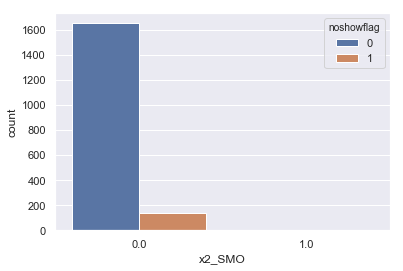

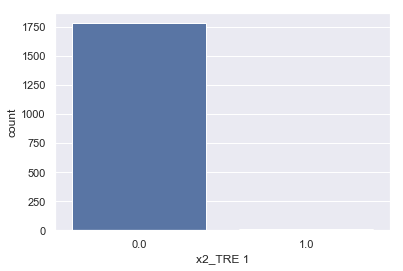

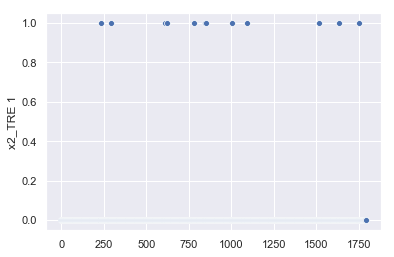

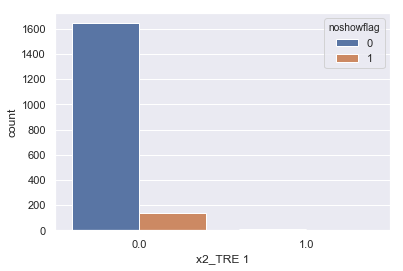

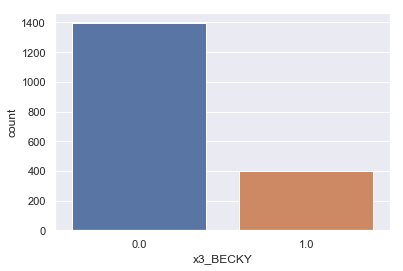

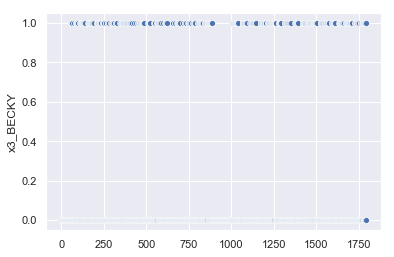

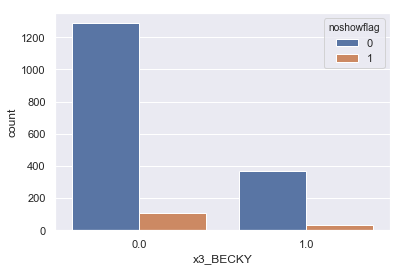

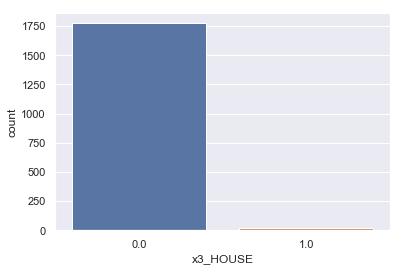

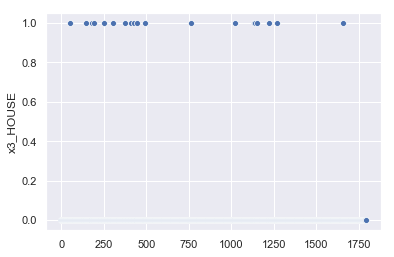

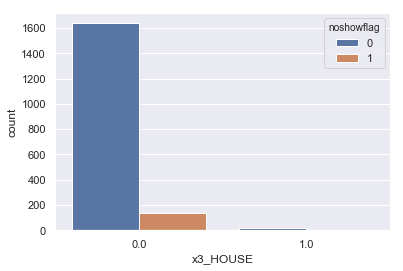

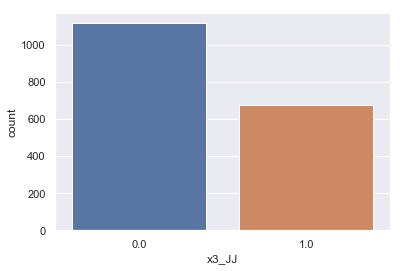

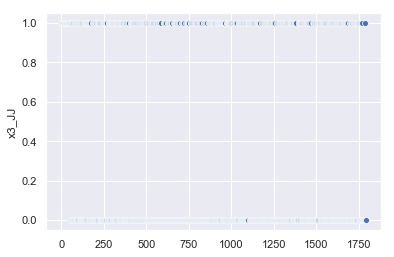

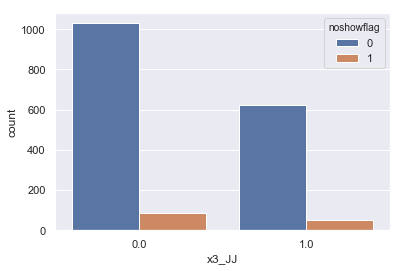

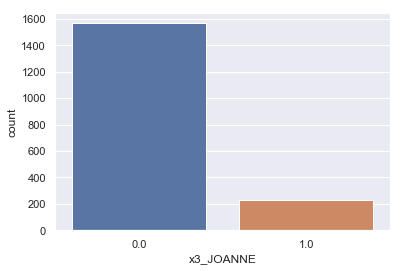

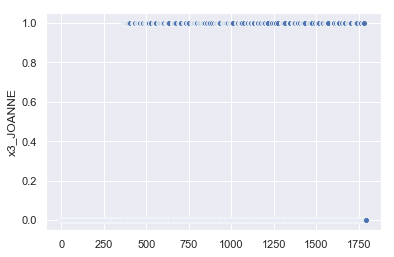

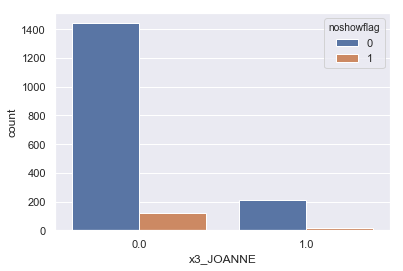

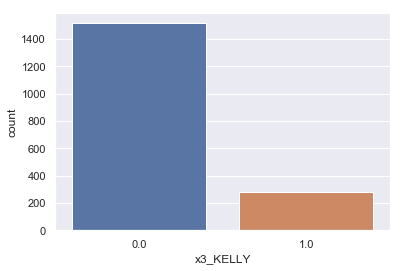

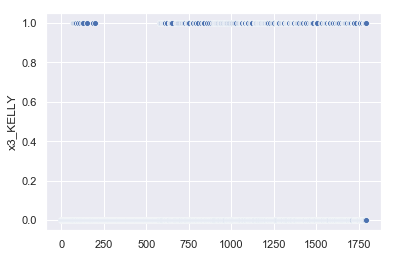

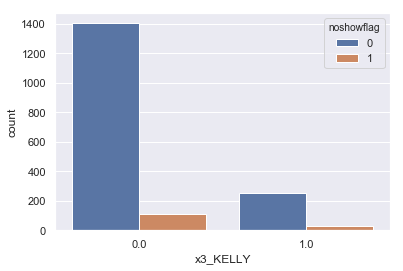

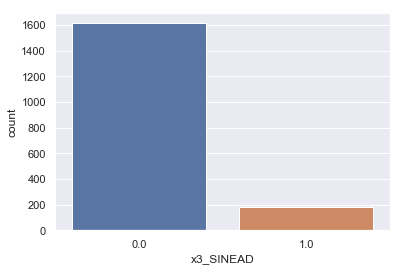

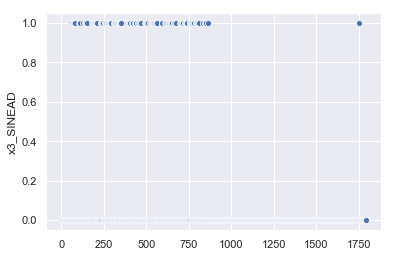

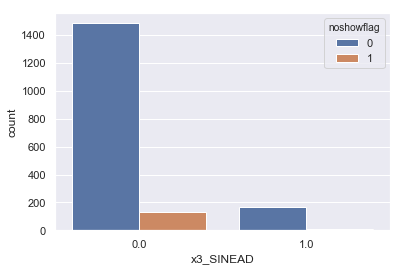

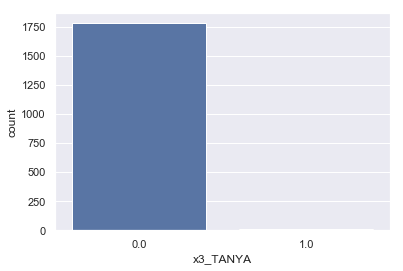

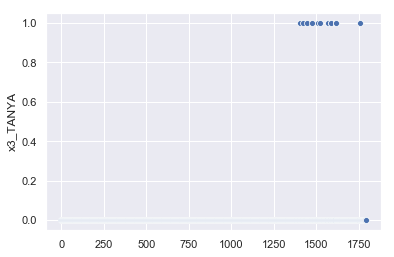

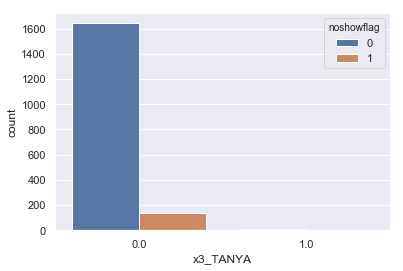

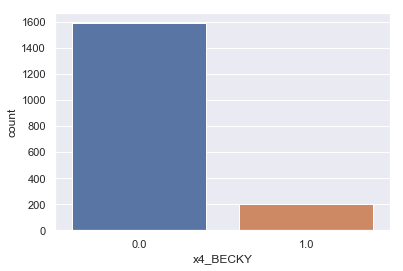

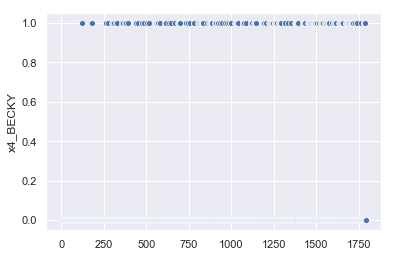

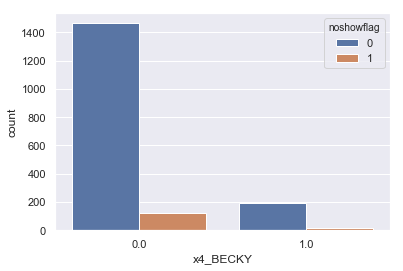

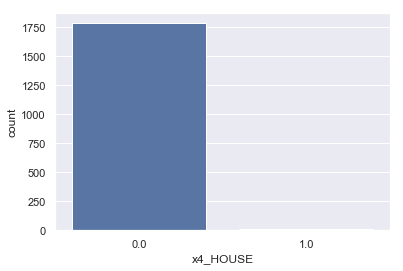

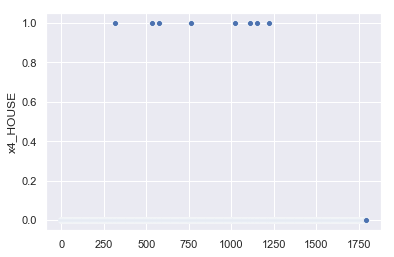

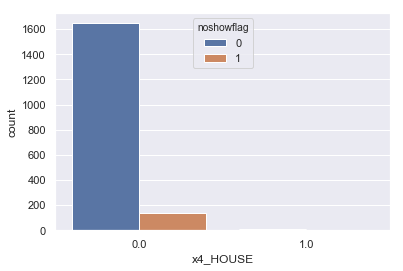

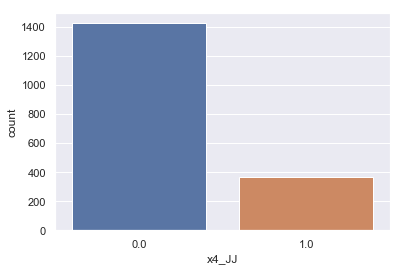

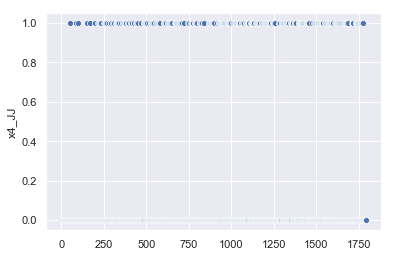

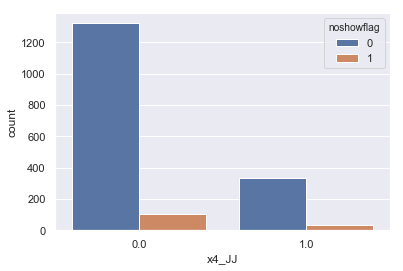

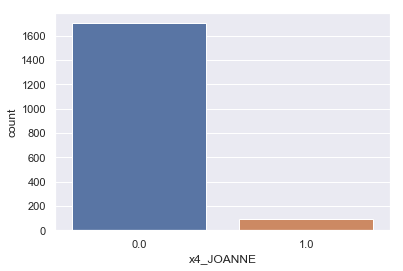

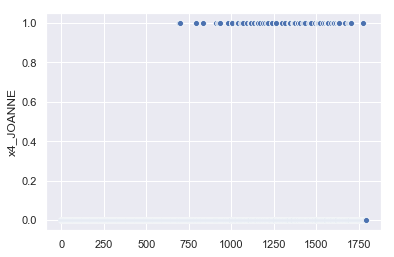

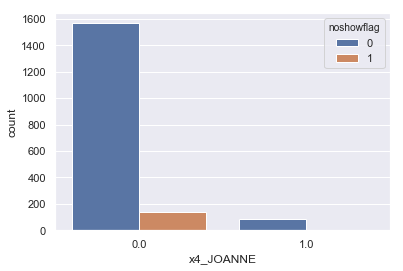

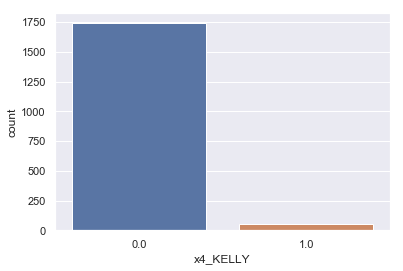

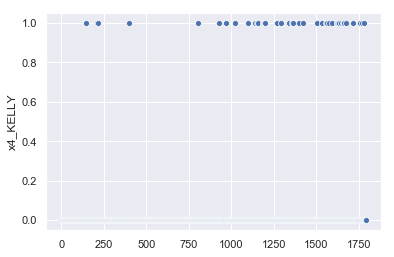

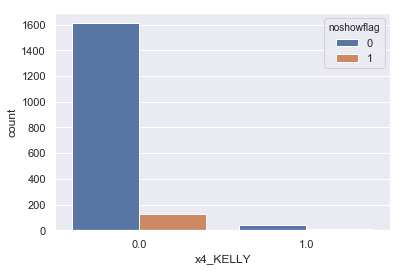

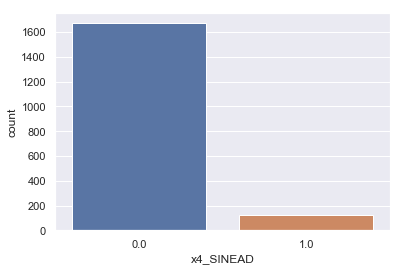

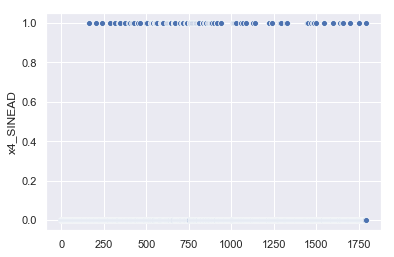

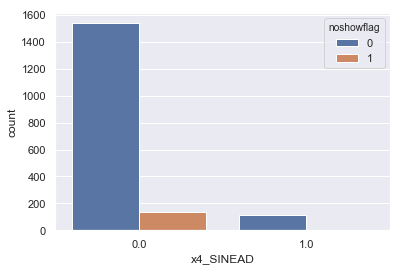

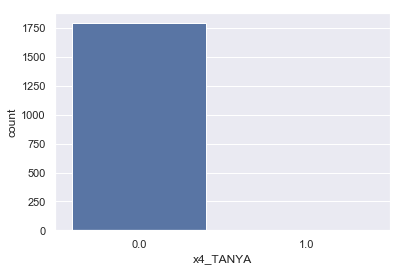

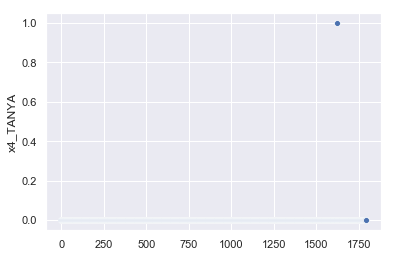

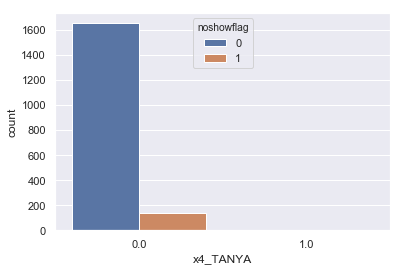

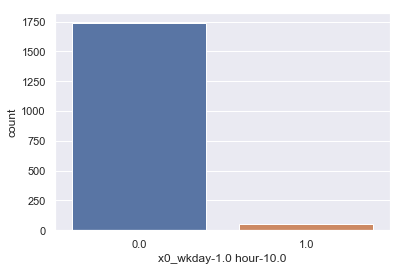

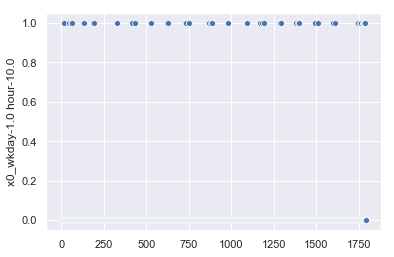

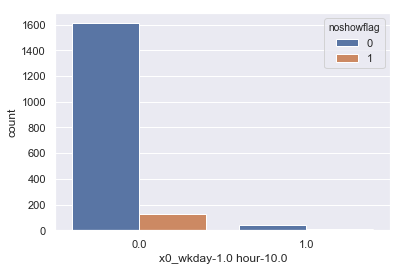

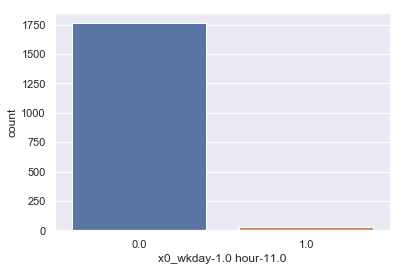

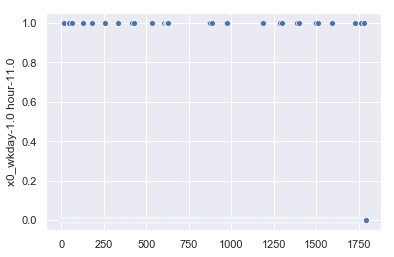

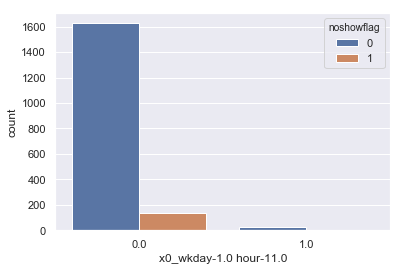

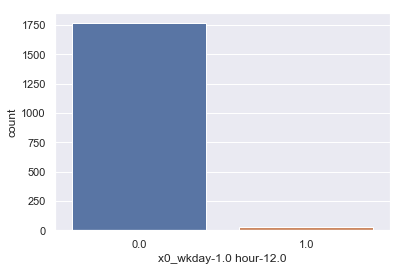

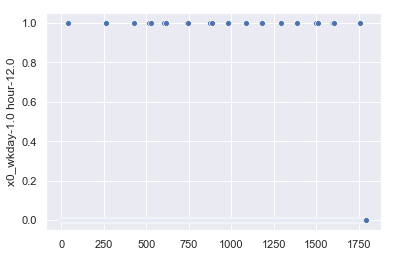

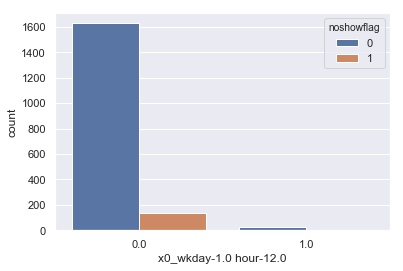

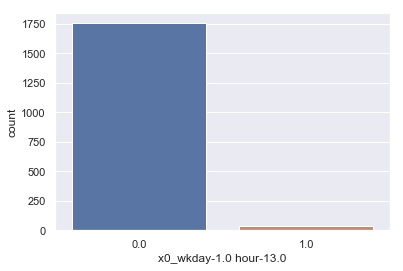

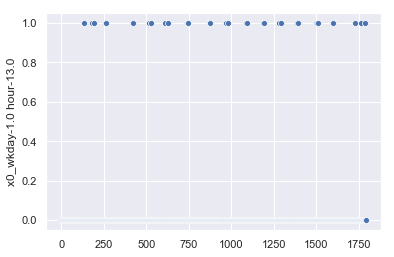

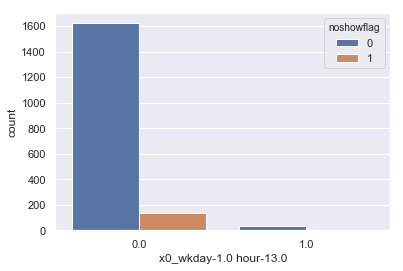

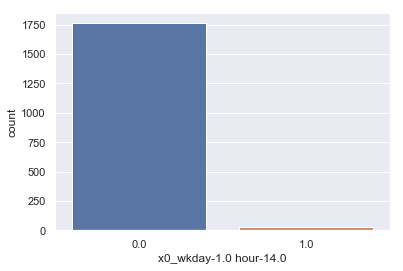

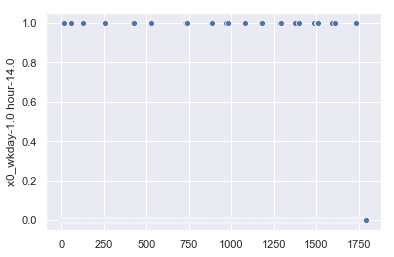

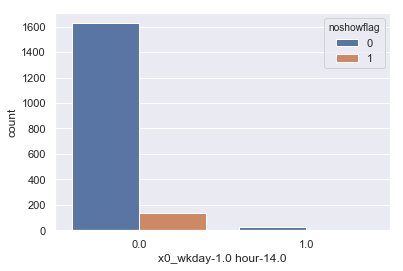

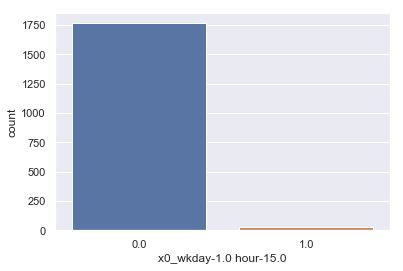

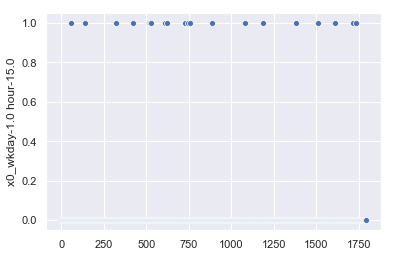

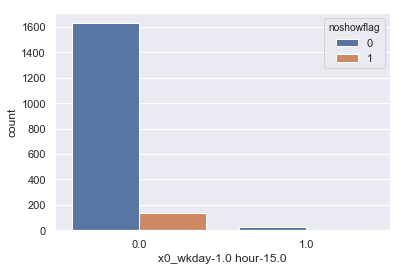

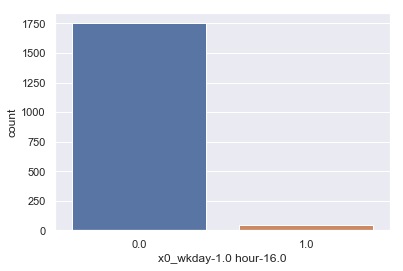

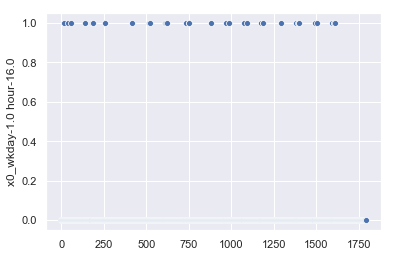

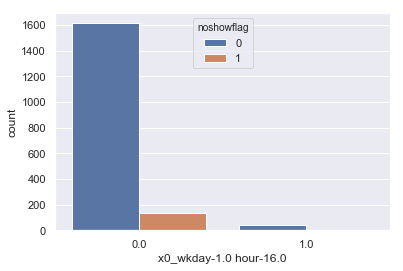

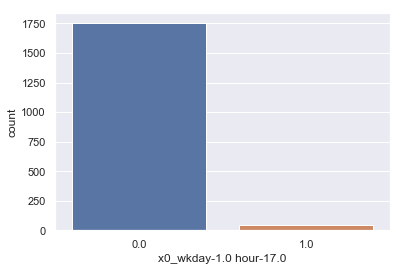

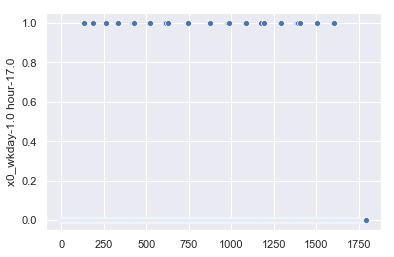

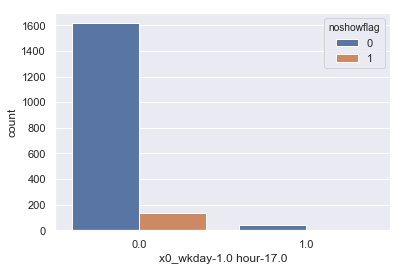

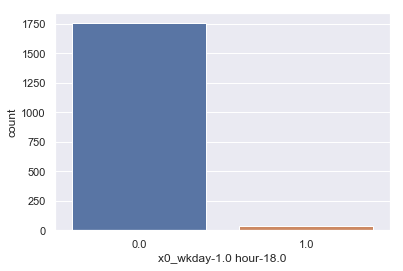

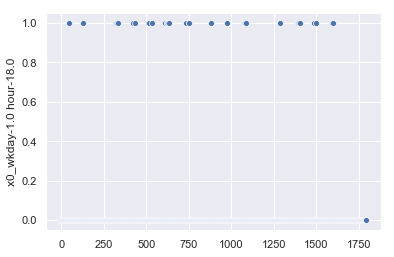

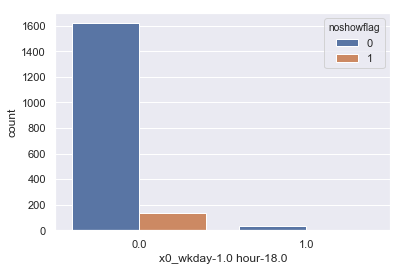

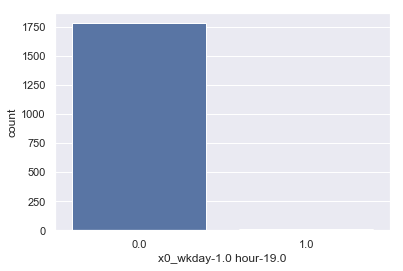

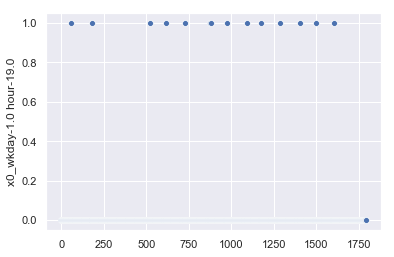

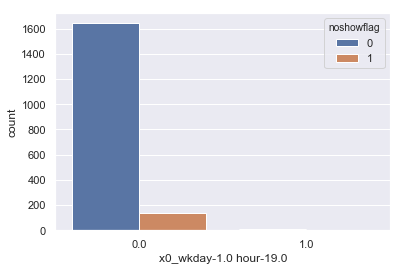

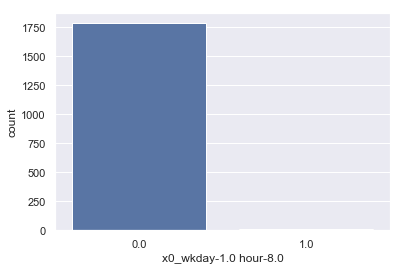

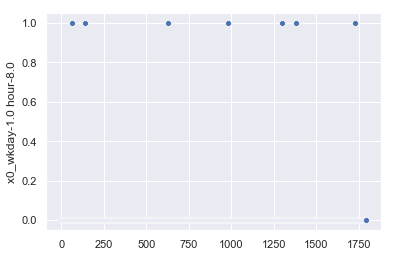

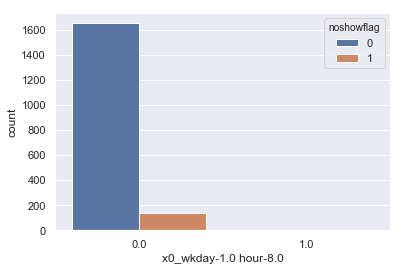

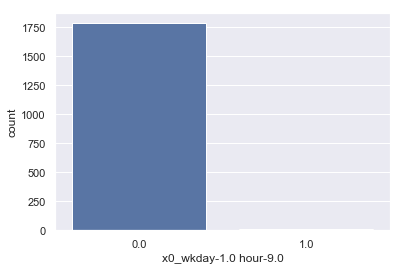

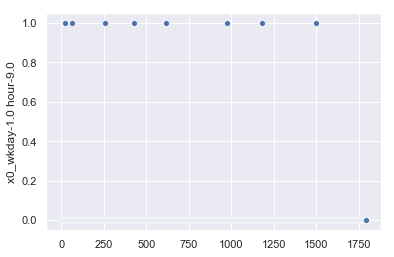

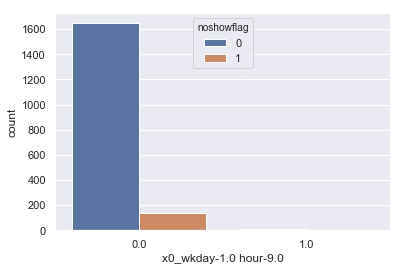

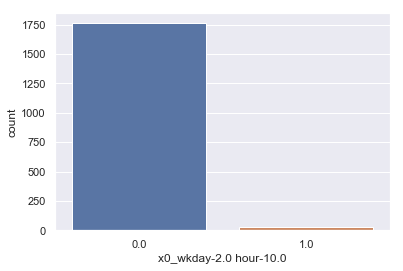

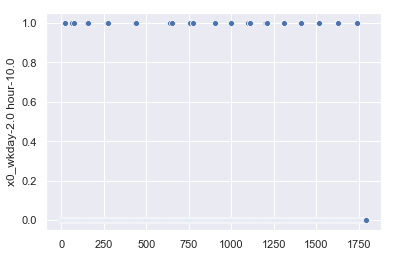

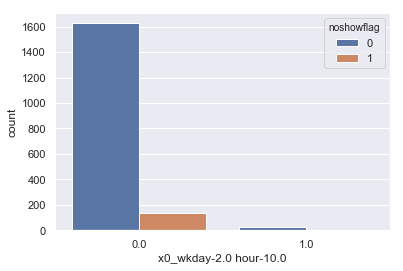

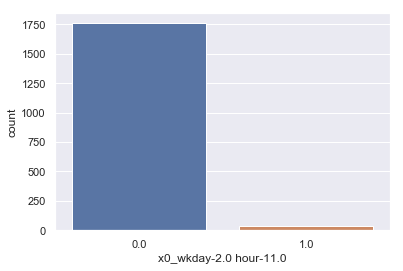

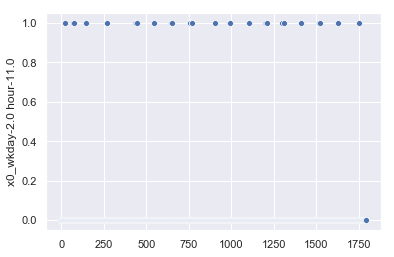

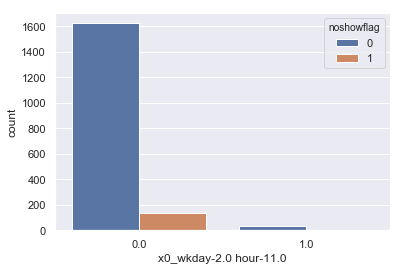

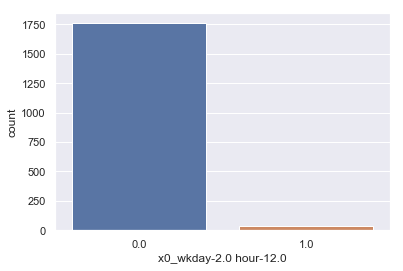

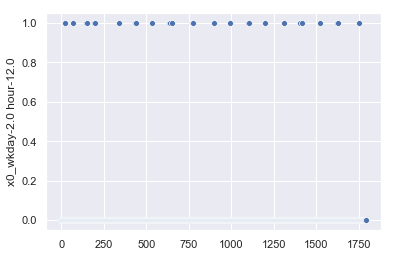

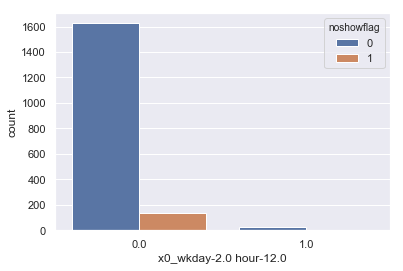

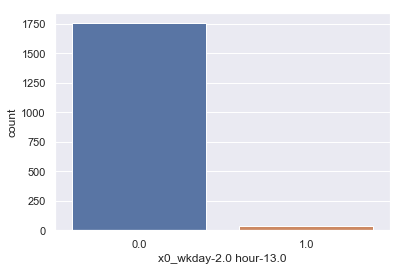

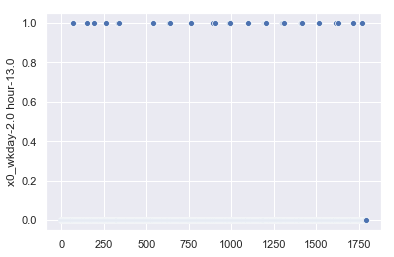

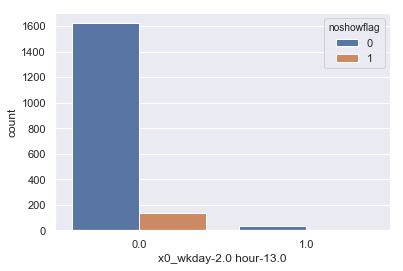

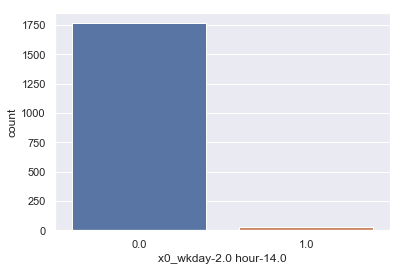

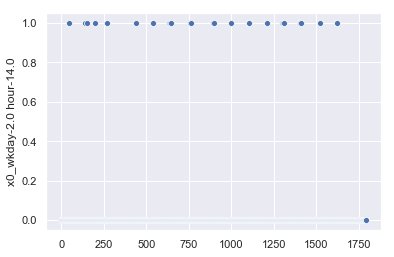

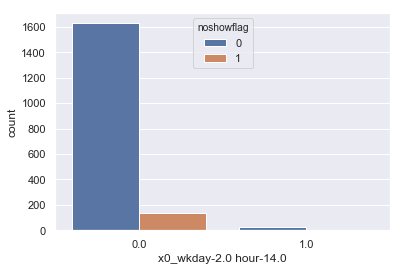

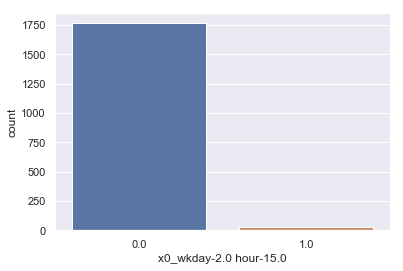

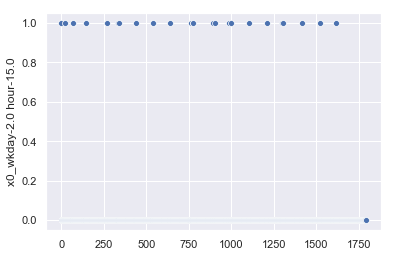

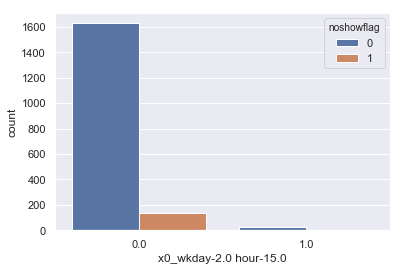

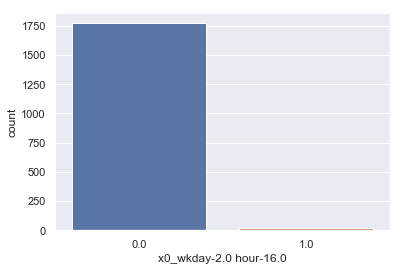

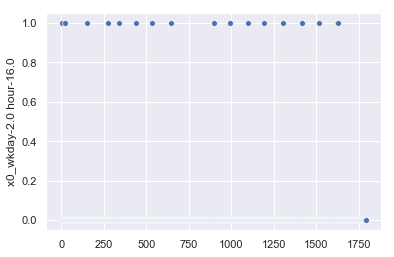

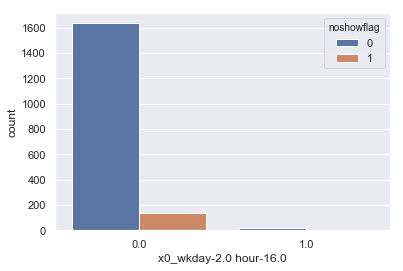

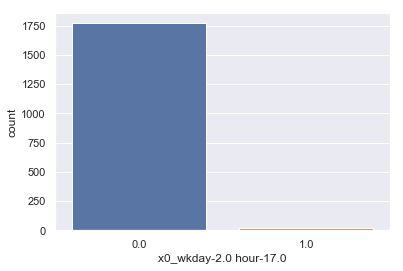

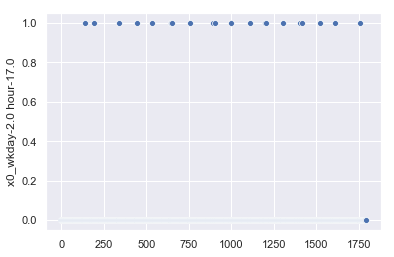

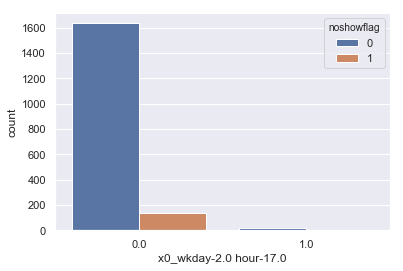

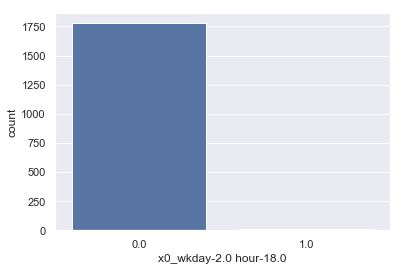

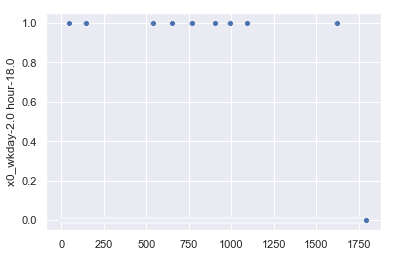

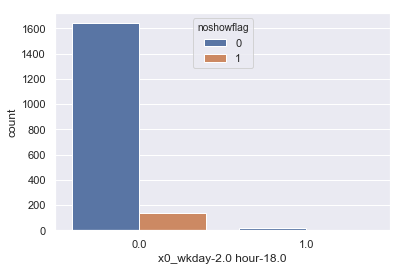

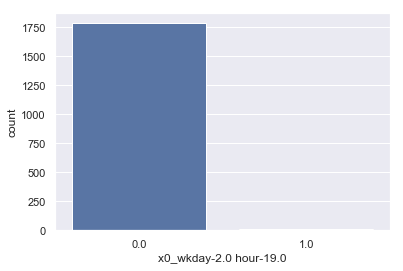

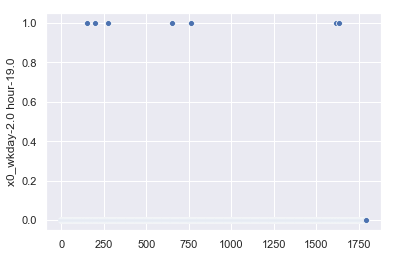

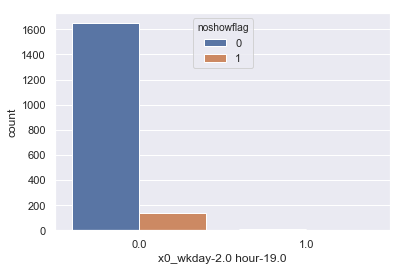

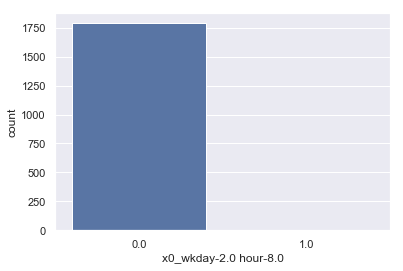

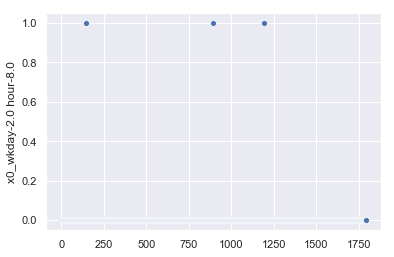

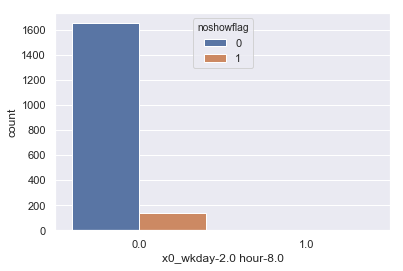

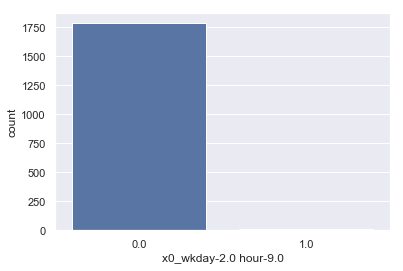

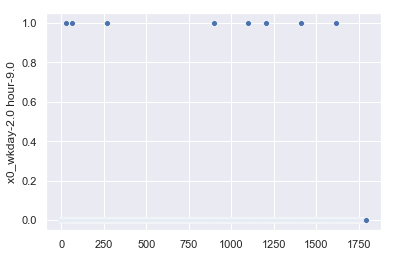

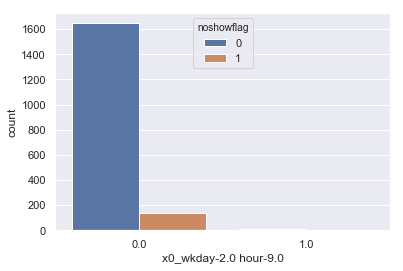

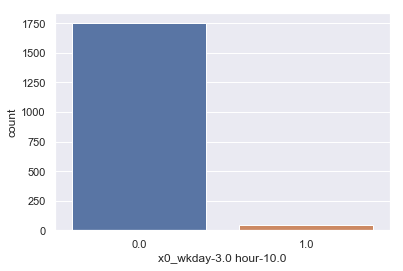

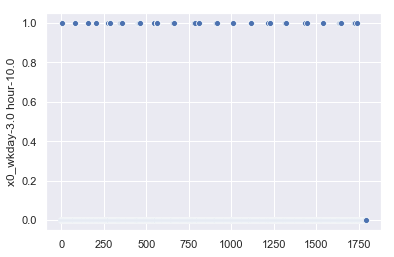

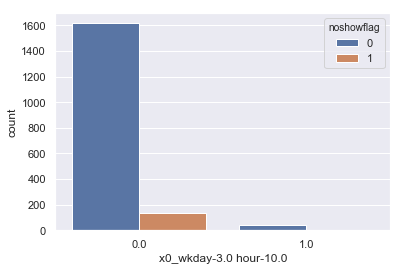

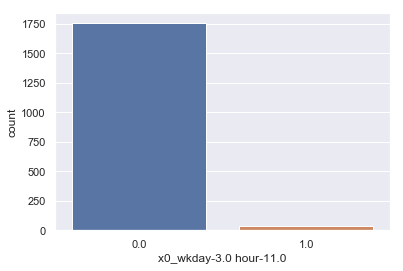

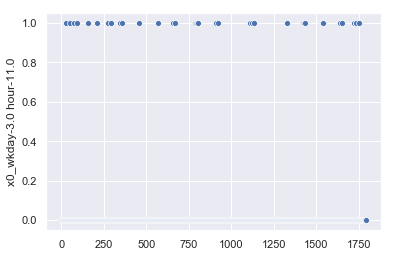

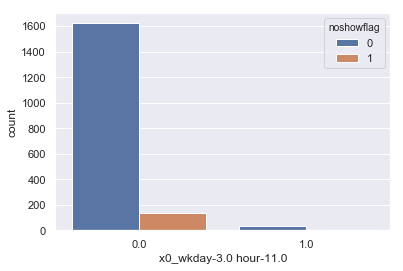

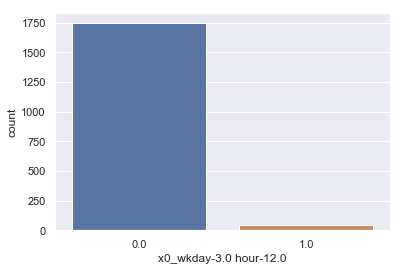

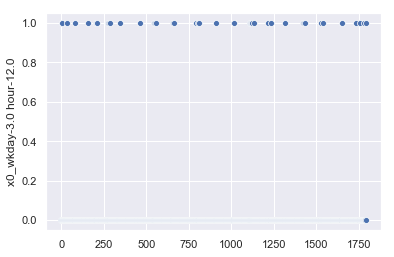

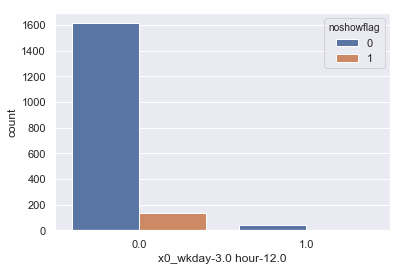

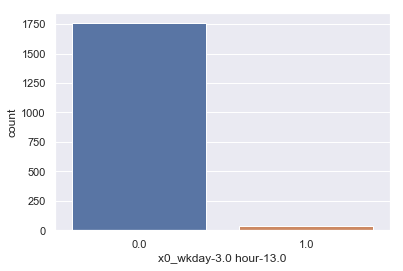

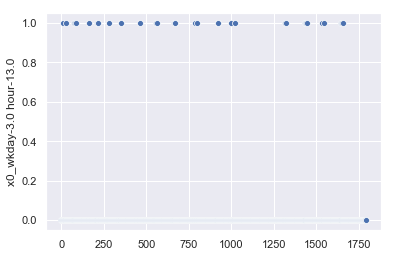

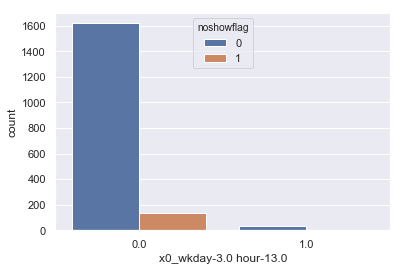

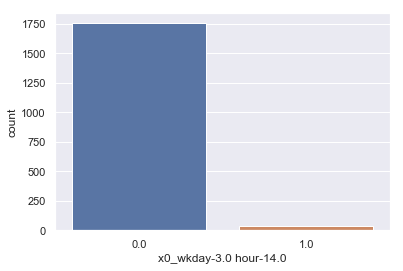

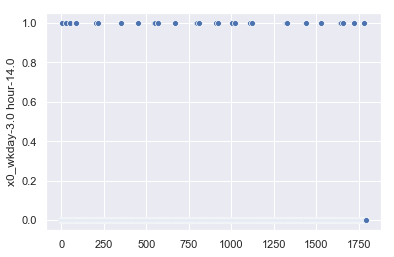

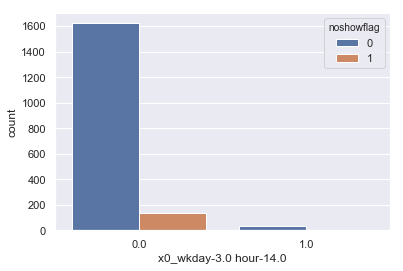

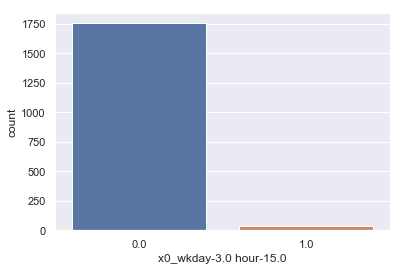

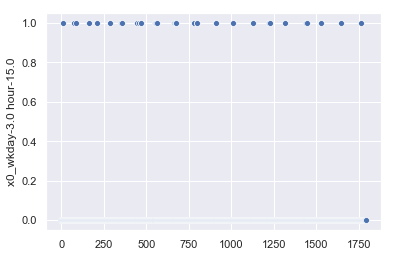

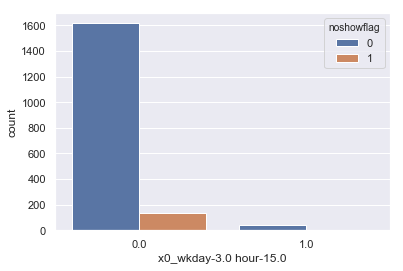

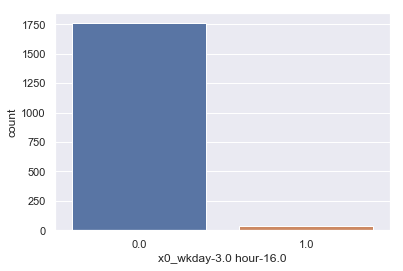

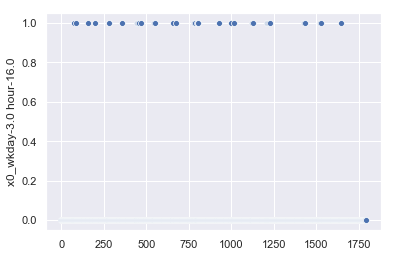

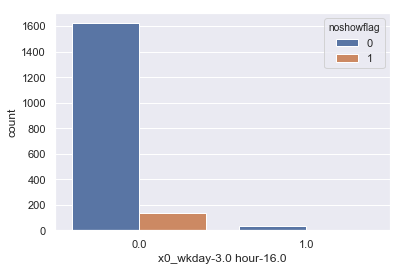

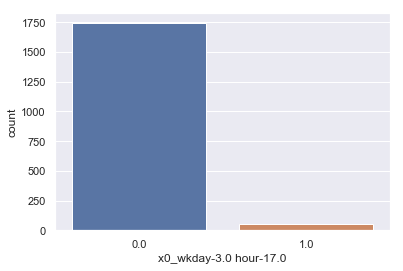

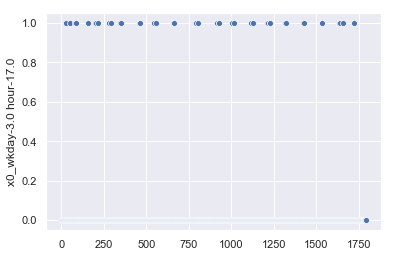

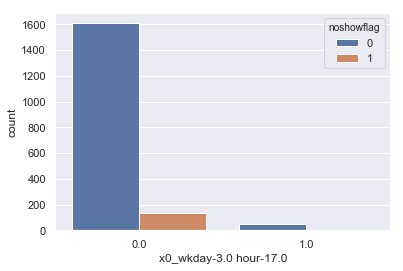

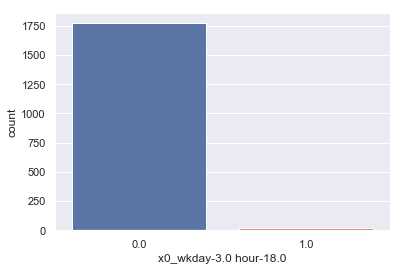

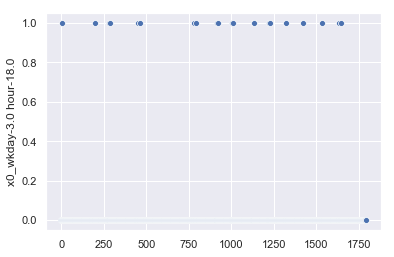

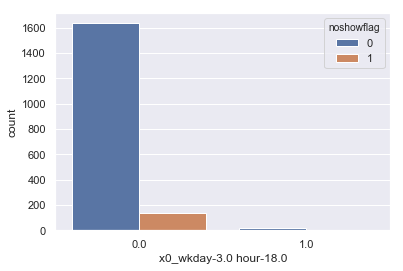

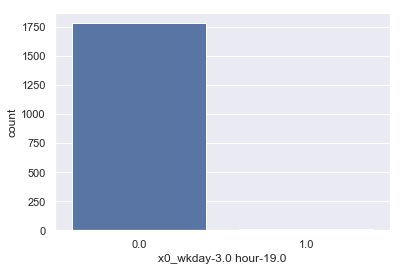

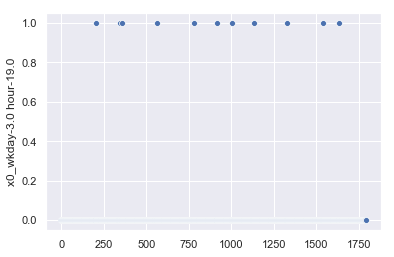

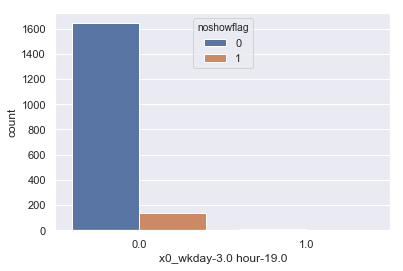

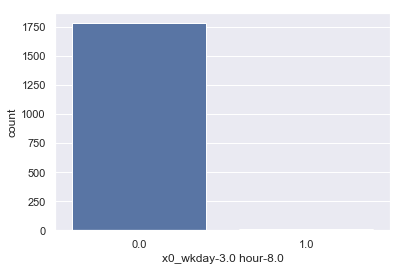

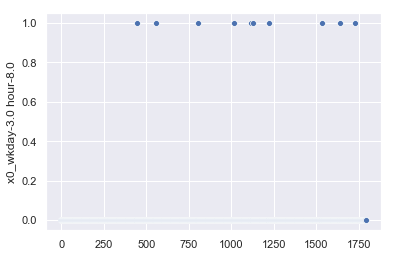

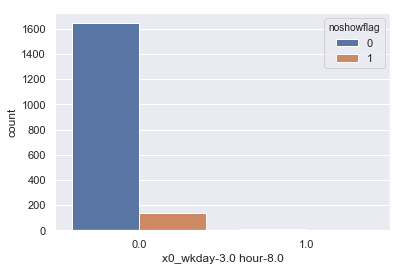

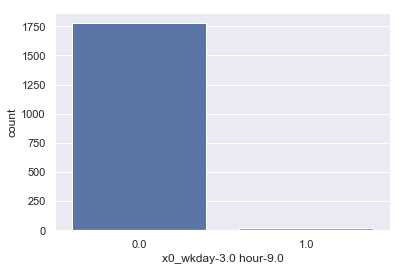

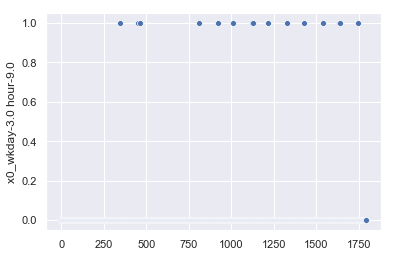

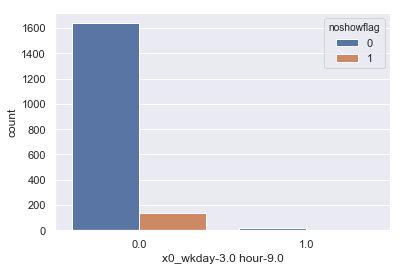

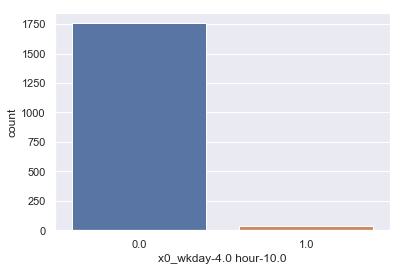

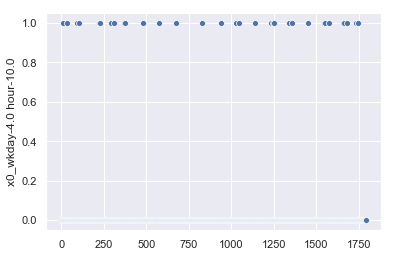

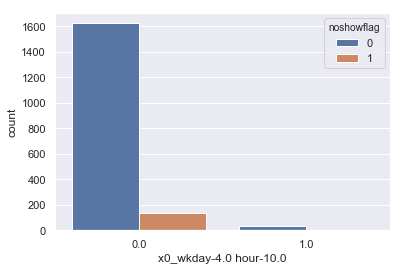

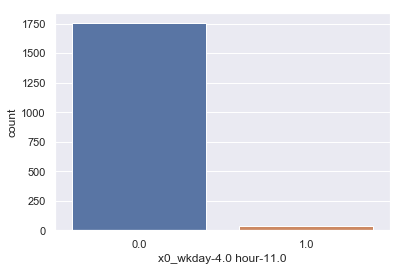

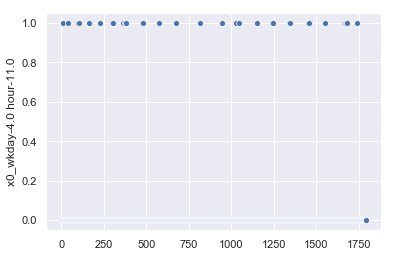

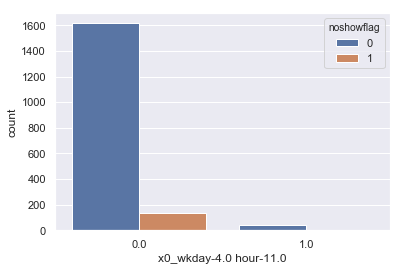

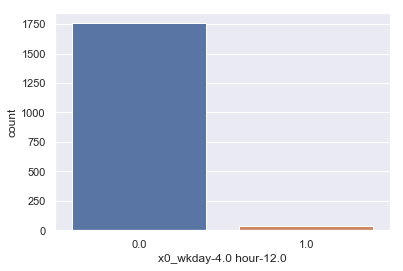

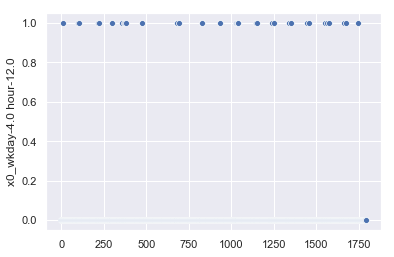

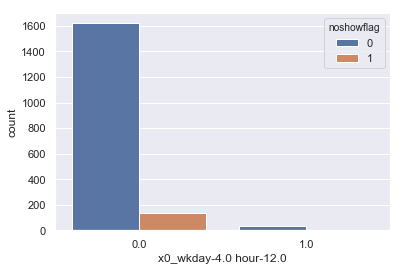

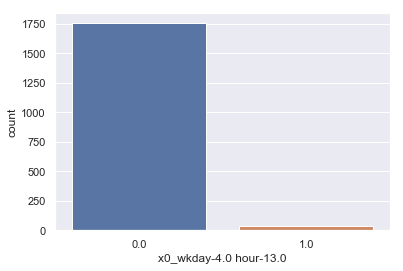

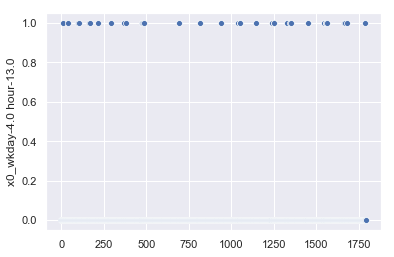

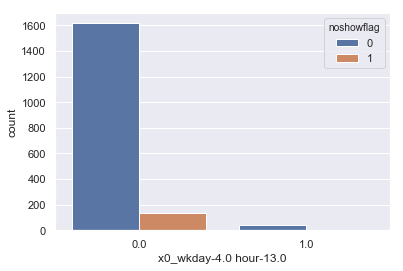

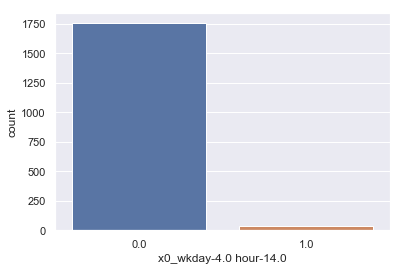

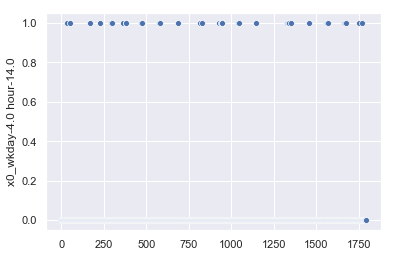

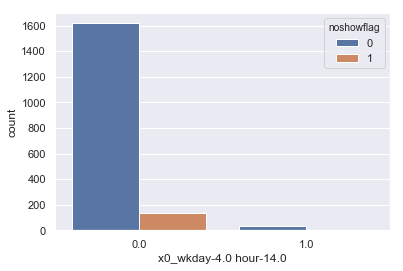

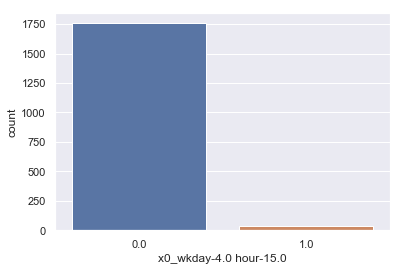

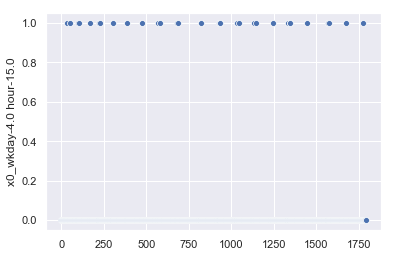

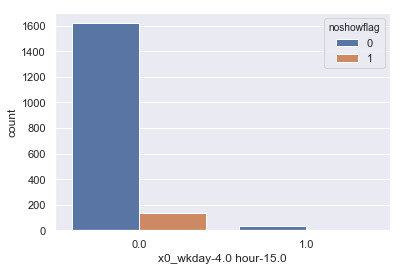

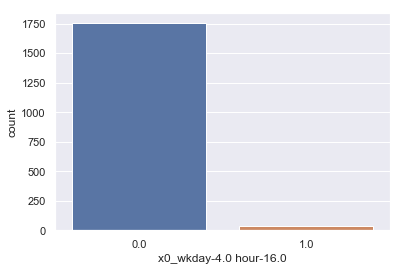

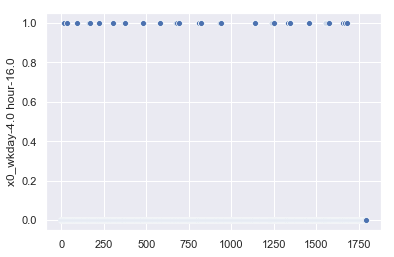

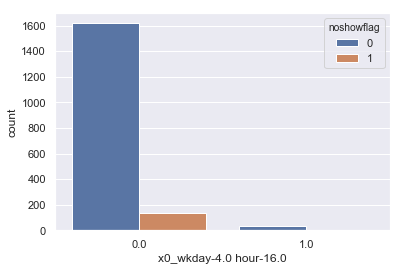

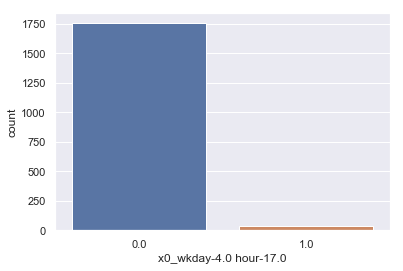

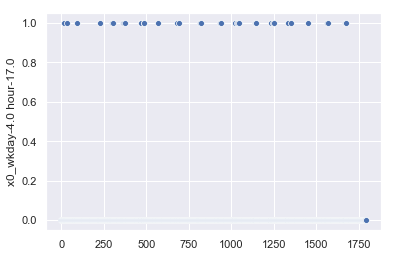

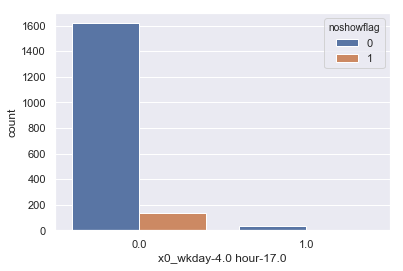

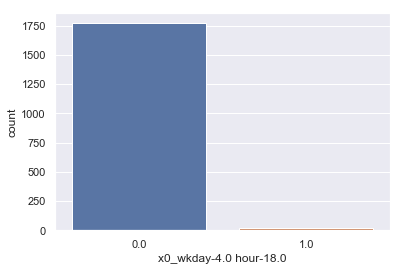

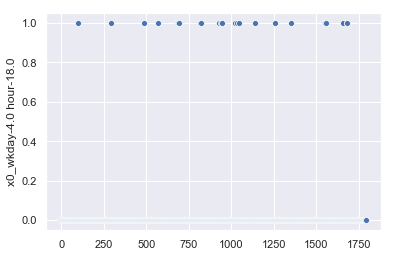

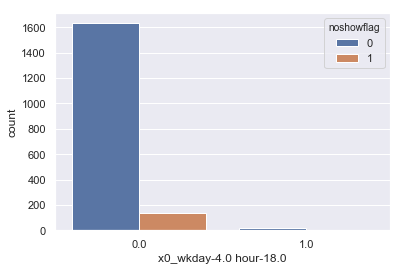

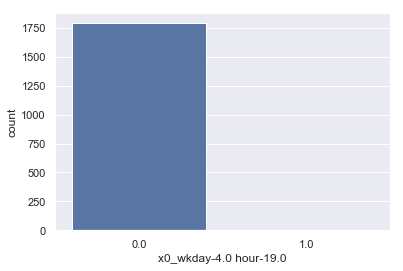

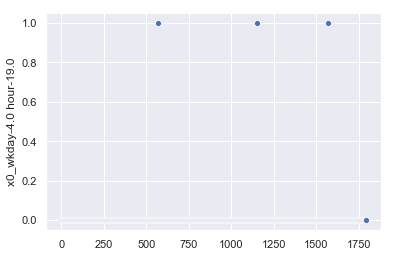

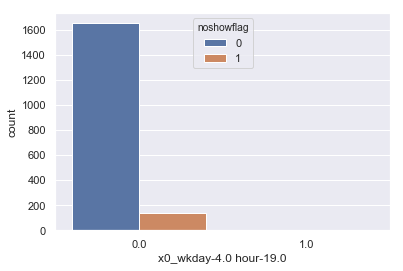

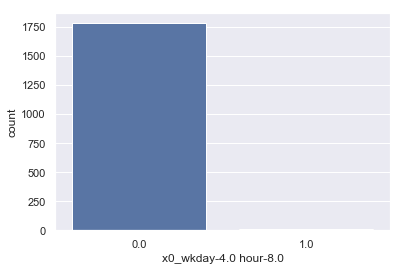

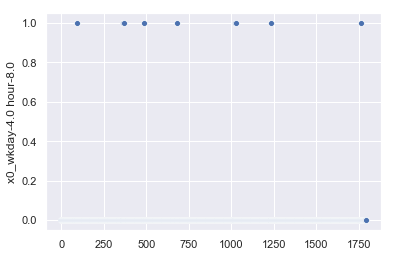

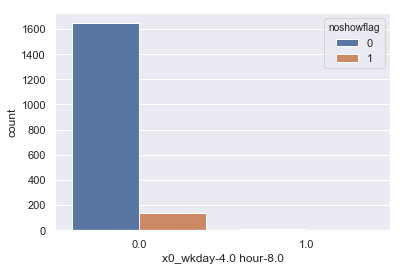

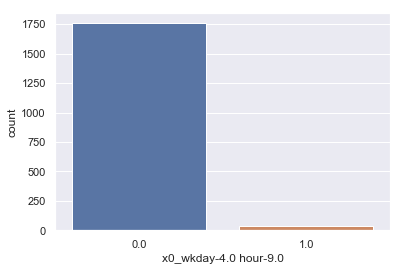

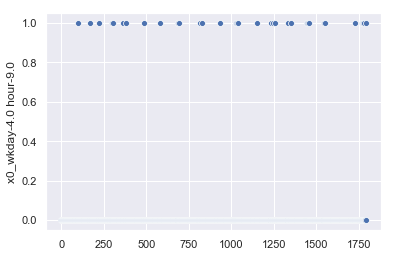

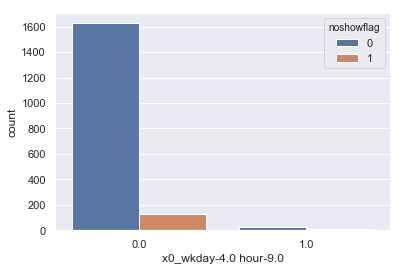

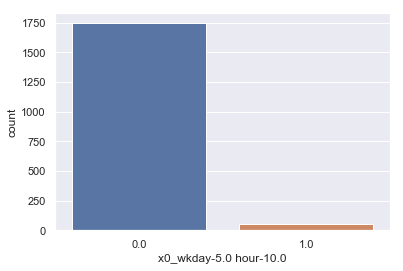

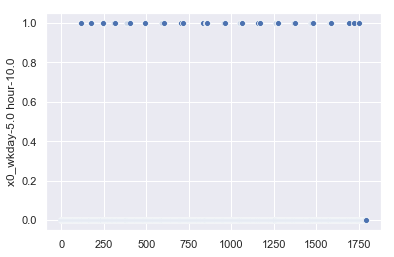

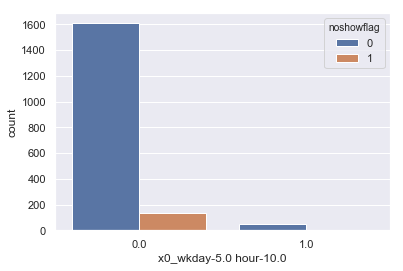

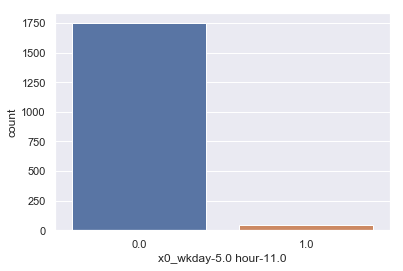

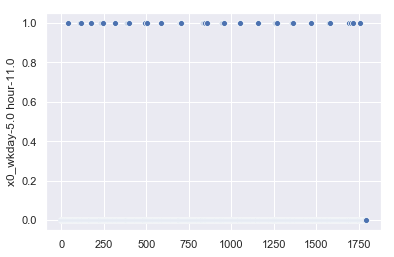

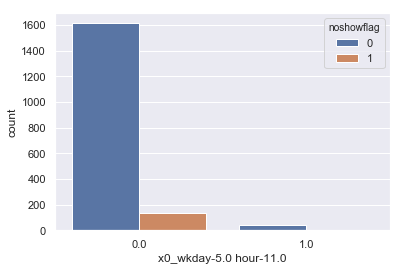

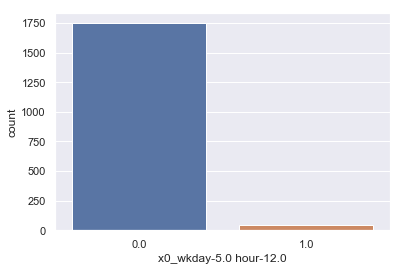

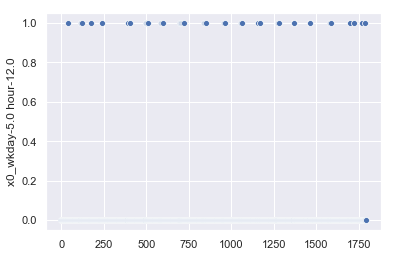

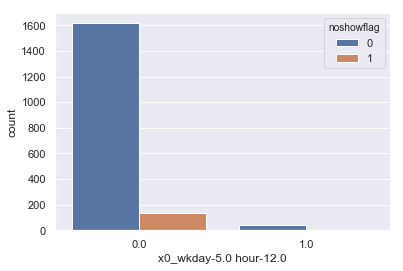

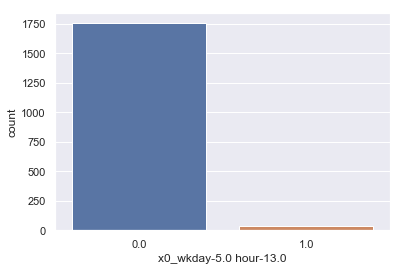

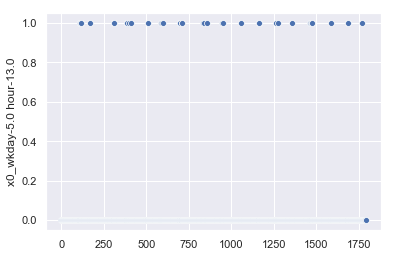

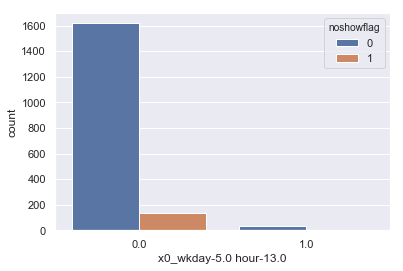

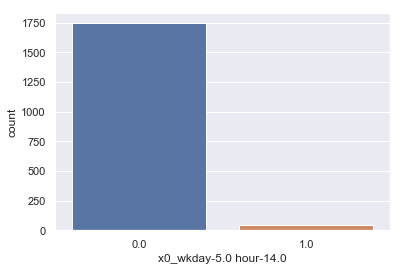

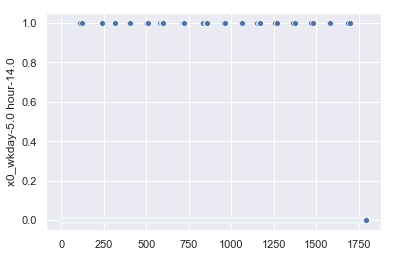

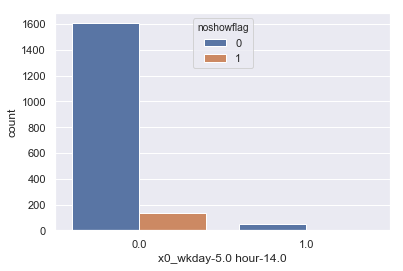

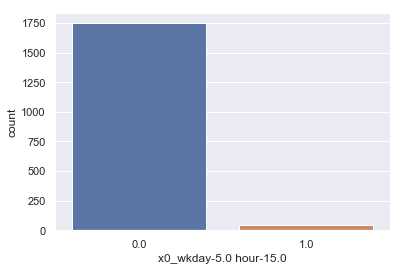

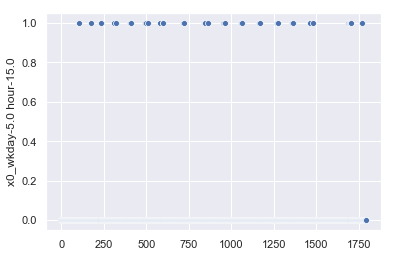

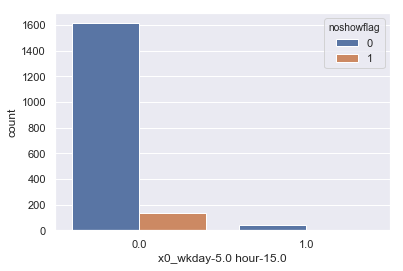

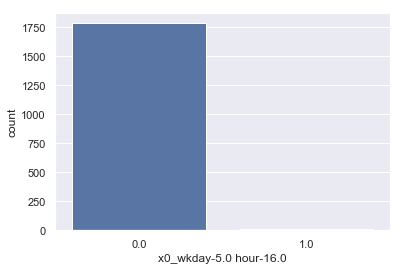

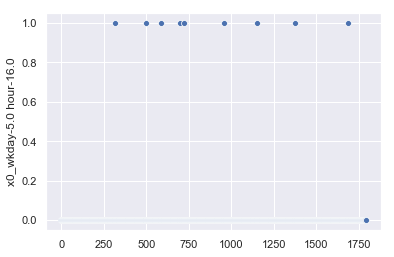

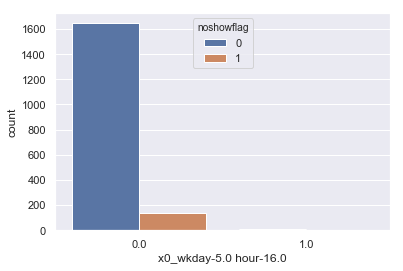

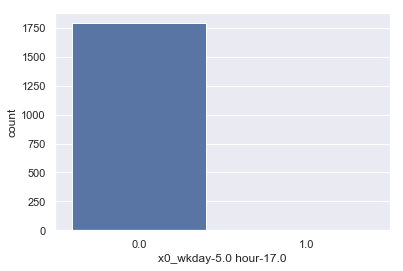

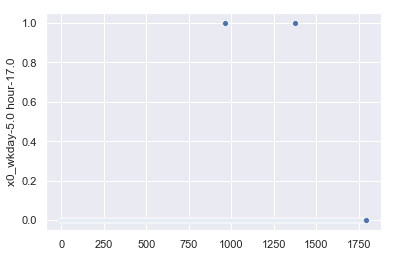

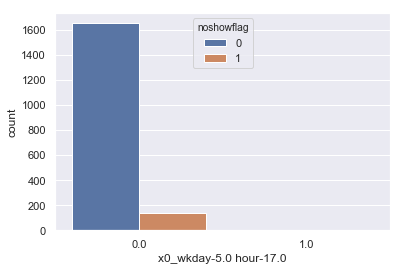

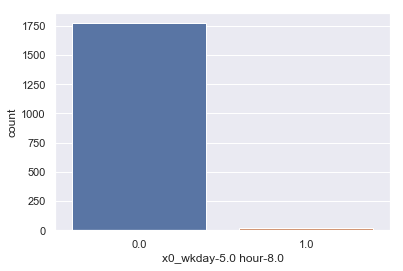

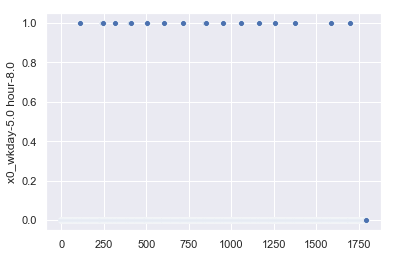

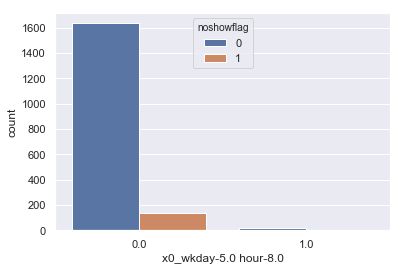

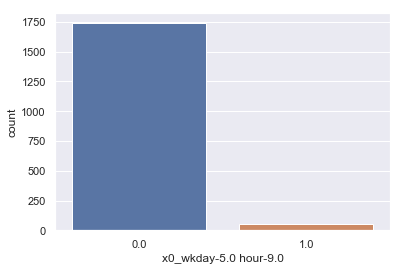

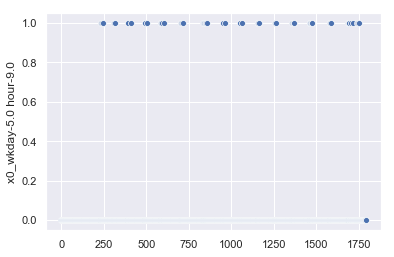

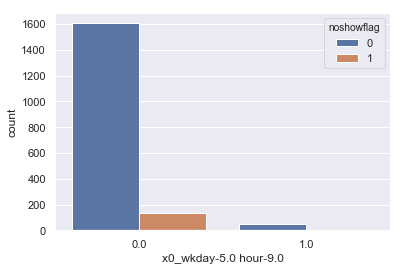

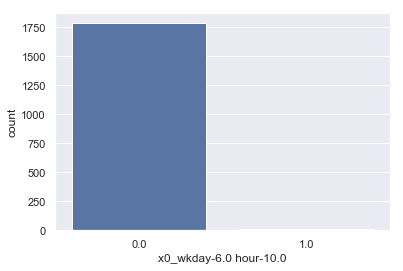

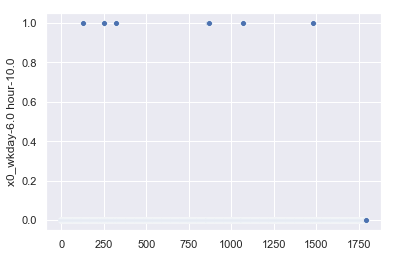

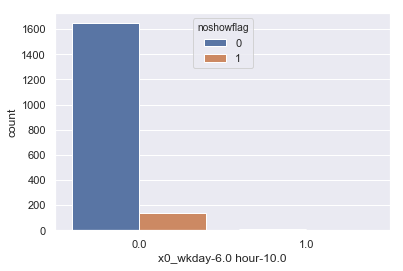

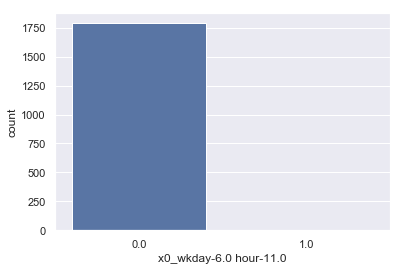

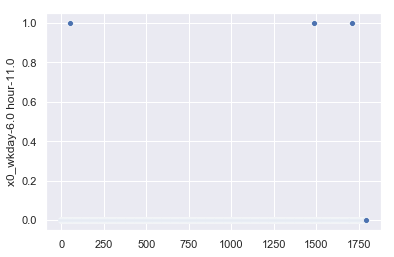

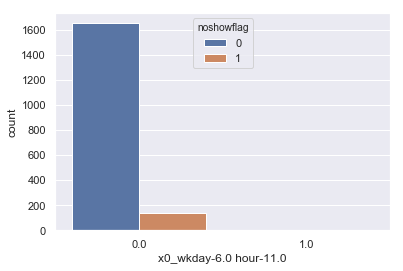

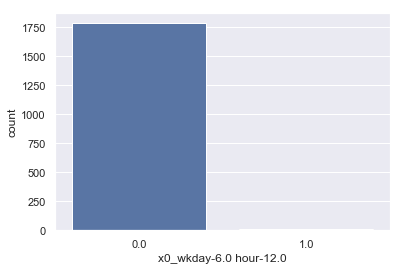

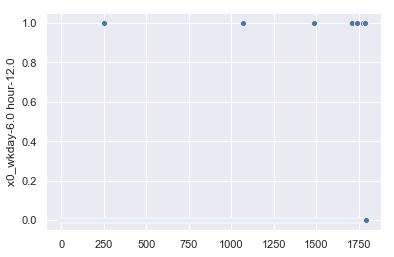

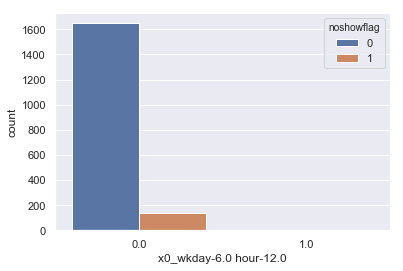

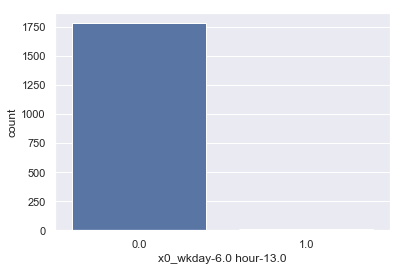

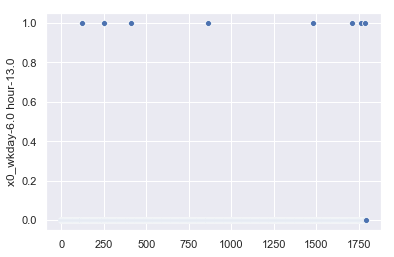

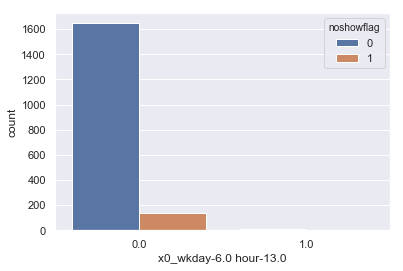

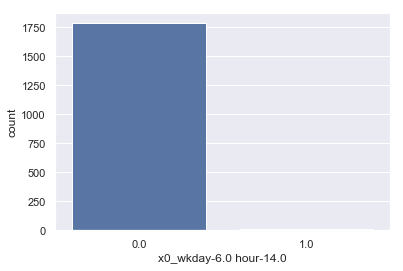

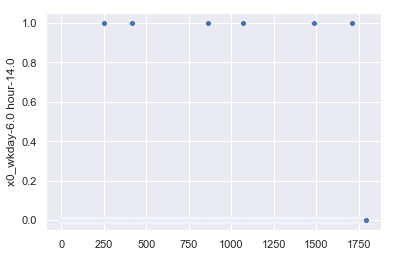

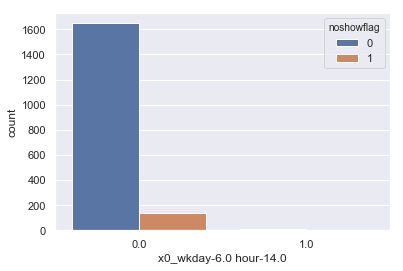

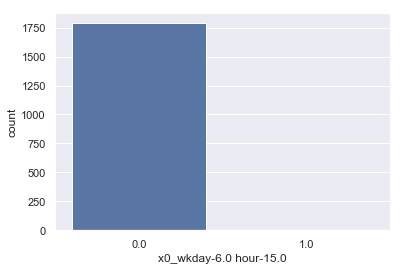

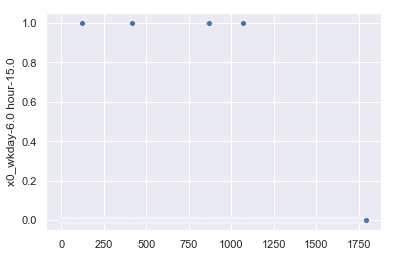

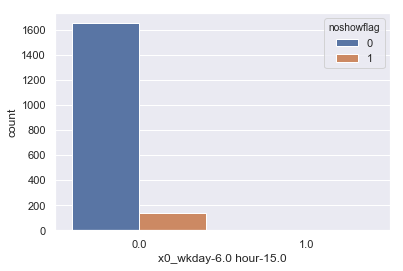

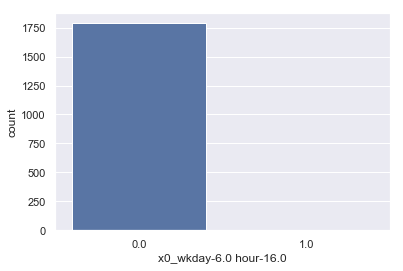

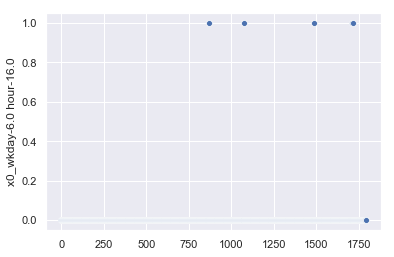

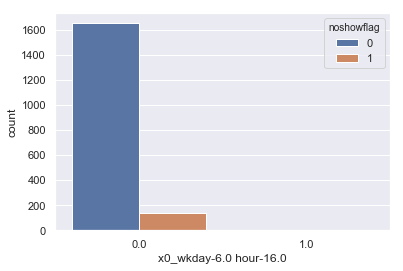

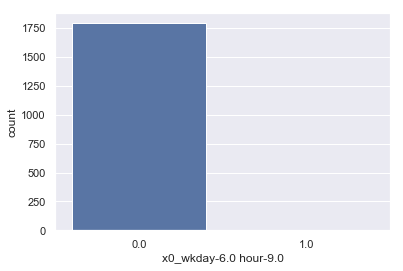

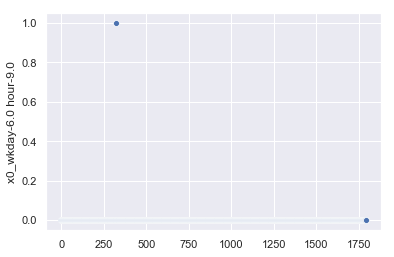

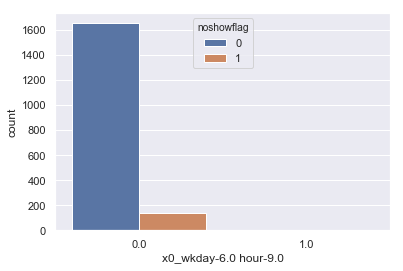

<Figure size 432x288 with 0 Axes>

In [295]:
mechkar.pyMechkar().exploreData(data=final,y='noshowflag')

In [296]:
x=final.columns.tolist()
tab1 = mechkar.pyMechkar().Table1(x=x,y="noshowflag",data=final,miss=3, catmiss=True,excel=True,excel_file="Table1_hairsalon.xlsx")

Factorizing... please wait
*************************************************************************************************************************************
[]
[**************************************************************************************************************************************
[**************************************************************************************************************************************
['Unable to calcualte the Fisher exact test for variables last60dnoshow and noshowflag... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last60misc and noshowflag... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last60dlatecancel and noshowflag... The p-value may be incorrect']
Excel file written to Table1_hairsalon.xlsx
------ Finished in 79.30577635765076econds -----


In [297]:
tab1

Variables    Categories                    Population  \
0               Individuals             n                          1793   
1                      week             4            159.00 (    8.90%)   
2                      week             5            159.00 (    8.90%)   
3                      week             3            384.00 (   21.40%)   
4                      week             2            392.00 (   21.90%)   
5                      week             1            435.00 (   24.30%)   
6                 dayinweek             3            361.00 (   20.10%)   
7                 dayinweek             4            361.00 (   20.10%)   
8                 dayinweek             1            266.00 (   14.80%)   
9                 dayinweek             5            384.00 (   21.40%)   
10                dayinweek             2            375.00 (   20.90%)   
11                dayinweek             6            355.00 (   19.80%)   
12                     hour            10            222.00 (   12.40%)   
13                     hour            13            199.00 (   11.10%)   
14                     hour            12            197.00 (   11.00%)   
15                     hour            14            191.00 (   10.70%)   
16                     hour            11            190.00 (   10.60%)   
17                     hour            15            181.00 (   10.10%)   
18                     hour         Other            460.00 (   25.70%)   
19                 firstapp             1            876.00 (   48.90%)   
20                 firstapp             0            917.00 (   51.10%)   
21         existingcustomer             0            949.00 (   52.90%)   
22         existingcustomer             1            844.00 (   47.10%)   
23            deltadaysappt     Mean (SD)              15.10 (   21.90)   
24            deltadaysappt  Median (IQR)      0.00 (    0.00-   28.00)   
26      deltadayslastnoshow     Mean (SD)               3.70 (   14.60)   
27      deltadayslastnoshow  Median (IQR)      0.00 (    0.00-    0.00)   
29             last60dvisit     Mean (SD)               0.90 (    1.60)   
30             last60dvisit  Median (IQR)      0.00 (    0.00-    1.00)   
32             multipleappt             0          1,360.00 (   75.90%)   
..                      ...           ...                           ...   
264  x0_wkday-5.0 hour-13.0             0          1,754.00 (   97.80%)   
265  x0_wkday-5.0 hour-13.0             1             39.00 (    2.20%)   
266  x0_wkday-5.0 hour-14.0             0          1,745.00 (   97.30%)   
267  x0_wkday-5.0 hour-14.0             1             48.00 (    2.70%)   
268  x0_wkday-5.0 hour-15.0             0          1,749.00 (   97.50%)   
269  x0_wkday-5.0 hour-15.0             1             44.00 (    2.50%)   
270  x0_wkday-5.0 hour-16.0             0          1,784.00 (   99.50%)   
271  x0_wkday-5.0 hour-16.0             1              9.00 (    0.50%)   
272  x0_wkday-5.0 hour-17.0             0          1,791.00 (   99.90%)   
273  x0_wkday-5.0 hour-17.0             1              2.00 (    0.10%)   
274   x0_wkday-5.0 hour-8.0             0          1,772.00 (   98.80%)   
275   x0_wkday-5.0 hour-8.0             1             21.00 (    1.20%)   
276   x0_wkday-5.0 hour-9.0             0          1,739.00 (   97.00%)   
277   x0_wkday-5.0 hour-9.0             1             54.00 (    3.00%)   
278  x0_wkday-6.0 hour-10.0             0          1,785.00 (   99.60%)   
279  x0_wkday-6.0 hour-10.0             1              8.00 (    0.40%)   
280  x0_wkday-6.0 hour-11.0             0          1,789.00 (   99.80%)   
281  x0_wkday-6.0 hour-11.0             1              4.00 (    0.20%)   
282  x0_wkday-6.0 hour-12.0             0          1,784.00 (   99.50%)   
283  x0_wkday-6.0 hour-12.0             1              9.00 (    0.50%)   
284  x0_wkday-6.0 hour-13.0             0          1,782.00 (   99.40%)   
285  x0_wkday-6.0 hour-13.0             1  

In [302]:
tab1[tab1.p_value < 0.05]

Variables Categories            Population  \
7                 dayinweek          4    361.00 (   20.10%)   
35           previousnoshow          1    174.00 (    9.70%)   
37            last60dnoshow          1    125.00 (    7.00%)   
67                   svcavg  Mean (SD)      65.40 (   36.70)   
73                  x1_MISC          1     68.00 (    3.80%)   
75                 x1_STYLE          0  1,423.00 (   79.40%)   
83                  x2_CBAL          1     20.00 (    1.10%)   
107                  x2_CON          1     56.00 (    3.10%)   
113                  x2_FRI          1      4.00 (    0.20%)   
127                 x2_SHCW          1    674.00 (   37.60%)   
163  x0_wkday-1.0 hour-10.0          1     56.00 (    3.10%)   
257   x0_wkday-4.0 hour-9.0          1     35.00 (    2.00%)   
267  x0_wkday-5.0 hour-14.0          1     48.00 (    2.70%)   

               Category_1            Category_0  p_value  
7       18.00 (   13.00%)    328.00 (   19.80%)    0.004  
35      24.00 (   17.40%)    150.00 (    9.10%)    0.002  
37      16.00 (   11.60%)    109.00 (    6.60%)    0.000  
67       50.50 (   53.20)      66.70 (   34.70)    0.000  
73      31.00 (   22.50%)     37.00 (    2.20%)    0.000  
75      82.00 (   59.40%)  1,341.00 (   81.00%)    0.000  
83       7.00 (    5.10%)     13.00 (    0.80%)    0.000  
107     30.00 (   21.70%)     26.00 (    1.60%)    0.000  
113      4.00 (    2.90%)      0.00 (    0.00%)    0.000  
127     25.00 (   18.10%)    649.00 (   39.20%)    0.000  
163     11.00 (    8.00%)     45.00 (    2.70%)    0.002  
257      7.00 (    5.10%)     28.00 (    1.70%)    0.015  
267      0.00 (    0.00%)     48.00 (    2.90%)    0.047